<div class="alert alert-block alert-info">
    <h1>IST718 Laboratory Exercise 2</h1>
</div>

### The research question is can we predict which three zip codes provide the best investment
### opportunity for the Syracuse Real Estate Investment Trust (SREIT)?

### Use the base data available from
### files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv

In [2]:
!pip install fbprophet

In [3]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


### Read Zillow data, crime rate and median income

In [4]:
Zillow = pd.read_csv(r"c:/Syracuse/IST718/Lab2/Zip_Zhvi_SingleFamilyResidence.csv",encoding = "ISO-8859-1")
Crime=pd.read_csv(r'c:/Syracuse/IST718/Lab2/CrimeRate.csv')
Income=pd.read_csv(r'c:/Syracuse/IST718/Lab2/income.csv')

In [5]:
Zillow.head()

RegionID  RegionName      City State                             Metro  \
0     61639       10025  New York    NY       New York-Newark-Jersey City   
1     84654       60657   Chicago    IL          Chicago-Naperville-Elgin   
2     61637       10023  New York    NY       New York-Newark-Jersey City   
3     91982       77494      Katy    TX  Houston-The Woodlands-Sugar Land   
4     84616       60614   Chicago    IL          Chicago-Naperville-Elgin   

        CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07  \
0  New York County         1       NaN       NaN       NaN       NaN   
1      Cook County         2  355664.0  354736.0  355404.0  355863.0   
2  New York County         3       NaN       NaN       NaN       NaN   
3    Harris County         4  197907.0  196854.0  195911.0  197300.0   
4      Cook County         5  537402.0  536919.0  539044.0  540137.0   

    1996-08   1996-09   1996-10   1996-11   1996-12   1997-01   1997-02  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  357309.0  359906.0  362935.0  366493.0  369236.0  371964.0  374364.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  197320.0  198443.0  197736.0  198462.0  199158.0  200824.0  201754.0   
4  542594.0  546190.0  550015.0  554436.0  557214.0  560140.0  562389.0   

    1997-03   1997-04   1997-05   1997-06   1997-07   1997-08   1997-09  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  376322.0  377455.0  380637.0  381917.0  384322.0  383195.0  381889.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  202558.0  205017.0  207485.0  208972.0  209013.0  211437.0  215407.0   
4  565003.0  566844.0  574208.0  578552.0  583864.0  582314.0  581470.0   

    1997-10   1997-11   1997-12   1998-01   1998-02   1998-03   1998-04  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  378162.0  374642.0  373445.0  370798.0  369891.0  367735.0  369673.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  217938.0  217189.0  214825.0  211272.0  209083.0  206815.0  206114.0   
4  578402.0  575431.0  574291.0  575269.0  578602.0  583276.0  588869.0   

    1998-05   1998-06   1998-07   1998-08   1998-09   1998-10   1998-11  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  371771.0  378334.0  386284.0  395034.0  403790.0  412949.0  421560.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  205047.0  204507.0  204444.0  203423.0  203923.0  204949.0  207069.0   
4  596347.0  604371.0  615222.0  625944.0  640232.0  651765.0  662952.0   

    1998-12   1999-01   1999-02   1999-03   1999-04   1999-05   1999-06  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  428867.0  432591.0  435328.0  436075.0  437380.0  439142.0  444487.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  207697.0  207549.0  207531.0  208211.0  209158.0  210300.0  211477.0   
4  671169.0  676136.0  679232.0  681187.0  686043.0  689523.0  697088.0   

    1999-07   1999-08   1999-09   1999-10   1999-11   1999-12   2000-01  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  452506.0  460445.0  466996.0  472696.0  479024.0  484508.0  490713.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  213057.0  214438.0  215233.0  216026.0  217439.0  219206.0  220873.0   
4  705580.0  715431.0  723215.0  731980.0  740632.0  748098.0  755577.0   

    2000-02   2000-03   2000-04   2000-05   2000-06   2000-07   2000-08  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  496030.0  501553.0  505357.0  510320.0  515789.0  522810.0  530530.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  221837.0  222849.0  223955.0  223167.0  222504.0  221375.0  221986.0   
4  762546.0  770113.0  777

#### Delete 1996 data

In [6]:
Zillow = Zillow.drop(['1996-04','1996-05','1996-06','1996-07','1996-08','1996-09','1996-10','1996-11','1996-12'], axis=1)

In [7]:
Zillow.isnull().sum()

RegionID          0
RegionName        0
City              0
State             0
Metro          7127
CountyName        0
SizeRank          0
1997-01       16518
1997-02       16469
1997-03       16411
1997-04       16360
1997-05       16330
1997-06       16309
1997-07       16290
1997-08       16244
1997-09       16195
1997-10       16153
1997-11       16103
1997-12       16084
1998-01       16044
1998-02       16015
1998-03       15922
1998-04       15758
1998-05       15657
1998-06       15556
1998-07       15504
1998-08       15391
1998-09       15296
1998-10       15241
1998-11       15207
1998-12       15194
1999-01       15039
1999-02       14981
1999-03       14871
1999-04       14814
1999-05       14724
1999-06       14652
1999-07       14589
1999-08       14506
1999-09       14405
1999-10       14338
1999-11       14283
1999-12       14244
2000-01       14183
2000-02       14150
2000-03       14117
2000-04       14068
2000-05       14041
2000-06       14009
2000-07       13949


In [8]:
# Unique zip codes
print(f'Unique zip codes: {Zillow.RegionName.nunique()}')
Zillow.head()

Unique zip codes: 30434


RegionID  RegionName      City State                             Metro  \
0     61639       10025  New York    NY       New York-Newark-Jersey City   
1     84654       60657   Chicago    IL          Chicago-Naperville-Elgin   
2     61637       10023  New York    NY       New York-Newark-Jersey City   
3     91982       77494      Katy    TX  Houston-The Woodlands-Sugar Land   
4     84616       60614   Chicago    IL          Chicago-Naperville-Elgin   

        CountyName  SizeRank   1997-01   1997-02   1997-03   1997-04  \
0  New York County         1       NaN       NaN       NaN       NaN   
1      Cook County         2  371964.0  374364.0  376322.0  377455.0   
2  New York County         3       NaN       NaN       NaN       NaN   
3    Harris County         4  200824.0  201754.0  202558.0  205017.0   
4      Cook County         5  560140.0  562389.0  565003.0  566844.0   

    1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  380637.0  381917.0  384322.0  383195.0  381889.0  378162.0  374642.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  207485.0  208972.0  209013.0  211437.0  215407.0  217938.0  217189.0   
4  574208.0  578552.0  583864.0  582314.0  581470.0  578402.0  575431.0   

    1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  373445.0  370798.0  369891.0  367735.0  369673.0  371771.0  378334.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  214825.0  211272.0  209083.0  206815.0  206114.0  205047.0  204507.0   
4  574291.0  575269.0  578602.0  583276.0  588869.0  596347.0  604371.0   

    1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  386284.0  395034.0  403790.0  412949.0  421560.0  428867.0  432591.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  204444.0  203423.0  203923.0  204949.0  207069.0  207697.0  207549.0   
4  615222.0  625944.0  640232.0  651765.0  662952.0  671169.0  676136.0   

    1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  435328.0  436075.0  437380.0  439142.0  444487.0  452506.0  460445.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  207531.0  208211.0  209158.0  210300.0  211477.0  213057.0  214438.0   
4  679232.0  681187.0  686043.0  689523.0  697088.0  705580.0  715431.0   

    1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  466996.0  472696.0  479024.0  484508.0  490713.0  496030.0  501553.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  215233.0  216026.0  217439.0  219206.0  220873.0  221837.0  222849.0   
4  723215.0  731980.0  740632.0  748098.0  755577.0  762546.0  770113.0   

    2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  505357.0  510320.0  515789.0  522810.0  530530.0  537037.0  543806.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  223955.0  223167.0  222504.0  221375.0  221986.0  222657.0  223906.0   
4  777067.0  785862.0  794288.0  805081.0  816900.0  828895.0  840102.0   

    2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  550113.0  557529.0  563420.0  567694.0  570972.0  574549.0  578975.0   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  225711.0  227047.0  227081.0  225591.0  223903.0  222949.0  224233.0   
4  851456.0  862161.0  869

#### Add additional columns, growth rate, standard dev and mean 

In [9]:
Zillow['Growth']= (Zillow['2019-12']/Zillow['1997-01'])-1
Zillow['std']=Zillow.loc[:,'2010-01':'2019-12'].std(skipna=True, axis=1)
Zillow['mean']=Zillow.loc[:,'2010-01':'2019-12'].mean(skipna=True, axis=1)
Zillow[['RegionName','Metro','CountyName','City','State','Growth','mean','std']].head()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


RegionName                             Metro       CountyName      City  \
0       10025       New York-Newark-Jersey City  New York County  New York   
1       60657          Chicago-Naperville-Elgin      Cook County   Chicago   
2       10023       New York-Newark-Jersey City  New York County  New York   
3       77494  Houston-The Woodlands-Sugar Land    Harris County      Katy   
4       60614          Chicago-Naperville-Elgin      Cook County   Chicago   

  State    Growth          mean            std  
0    NY       NaN  1.404704e+06   65670.084588  
1    IL  1.543063  8.474826e+05   96801.140079  
2    NY       NaN  1.418544e+06  155642.483212  
3    TX  0.664686  3.057283e+05   31407.798817  
4    IL  1.095919  1.055221e+06  117477.549261

#### Generate Top 20 zip codes based on growth rates

In [10]:
best20=Zillow.nlargest(20, ['Growth']) 
print('\n Best 20 Zipcodes:')
best20[['RegionName','Metro','CountyName','City','State','Growth','mean','std']]


 Best 20 Zipcodes:


RegionName                           Metro          CountyName  \
2331       90403  Los Angeles-Long Beach-Anaheim  Los Angeles County   
9350       91108  Los Angeles-Long Beach-Anaheim  Los Angeles County   
9981       90211  Los Angeles-Long Beach-Anaheim  Los Angeles County   
1088       90020  Los Angeles-Long Beach-Anaheim  Los Angeles County   
331        90027  Los Angeles-Long Beach-Anaheim  Los Angeles County   
253        90004  Los Angeles-Long Beach-Anaheim  Los Angeles County   
2251       90266  Los Angeles-Long Beach-Anaheim  Los Angeles County   
2733       90048  Los Angeles-Long Beach-Anaheim  Los Angeles County   
1626       94610   San Francisco-Oakland-Hayward      Alameda County   
4468       91030  Los Angeles-Long Beach-Anaheim  Los Angeles County   
2106       90069  Los Angeles-Long Beach-Anaheim  Los Angeles County   
7396       90212  Los Angeles-Long Beach-Anaheim  Los Angeles County   
43         90046  Los Angeles-Long Beach-Anaheim  Los Angeles County   
1307       90005  Los Angeles-Long Beach-Anaheim  Los Angeles County   
589        90036  Los Angeles-Long Beach-Anaheim  Los Angeles County   
2032       90291  Los Angeles-Long Beach-Anaheim  Los Angeles County   
514        11216     New York-Newark-Jersey City        Kings County   
2814       90068  Los Angeles-Long Beach-Anaheim  Los Angeles County   
5310       90210  Los Angeles-Long Beach-Anaheim  Los Angeles County   
8143       90401  Los Angeles-Long Beach-Anaheim  Los Angeles County   

                 City State     Growth          mean            std  
2331     Santa Monica    CA  13.914982  1.092774e+06  518560.866240  
9350       San Marino    CA  13.776618  9.497870e+05  470036.233530  
9981    Beverly Hills    CA  12.554974  9.871943e+05  494881.970778  
1088      Los Angeles    CA  12.272559  1.488784e+06  635028.946798  
331       Los Angeles    CA  11.977903  7.680990e+05  335516.443857  
253       Los Angeles    CA  11.318958  7.775213e+05  338011.493077  
2251  Manhattan Beach    CA  10.948580  1.071792e+06  507941.211850  
2733      Los Angeles    CA  10.497167  9.961686e+05  406054.897367  
1626          Oakland    CA  10.286459  8.363412e+05  401629.738911  
4468   South Pasadena    CA  10.195877  6.273837e+05  268614.706156  
2106   West Hollywood    CA   9.604911  1.297958e+06  533324.387651  
7396    Beverly Hills    CA   9.271800  1.453807e+06  614666.562734  
43        Los Angeles    CA   9.170598  9.438518e+05  372731.539802  
1307      Los Angeles    CA   9.067142  8.978202e+05  344777.433684  
589       Los Angeles    CA   8.657940  9.829735e+05  378354.297132  
2032      Los Angeles    CA   8.409081  1.038788e+06  412799.270720  
514          New York    NY   8.332922  1.047424e+06  381081.572991  
2814      Los Angeles    CA   8.272667  8.431533e+05  319368.055118  
5310    Beverly Hills    CA   8.216722  2.298412e+06  868016.499644  
8143     Santa Monica    CA   8.152619  1.228189e+06  414800.255759

In [11]:
Crime.head()

CountyName State  crime_rate_per_100000  index  EDITION  PART  IDNO  \
0   Saint Louis City    MO            1791.995377      1        1     4  1612   
1  Crittenden County    AR            1754.914968      2        1     4   130   
2   Alexander County    IL            1664.700485      3        1     4   604   
3      Kenedy County    TX            1456.310680      4        1     4  2681   
4     De Soto Parish    LA            1447.402430      5        1     4  1137   

   CPOPARST  CPOPCRIM  AG_ARRST  AG_OFF  COVIND  INDEX  MODINDX  MURDER  RAPE  \
0    318667    318667        15      15   100.0   5706    22329     119   200   
1     50717     50717         4       4   100.0    873     3424       8    38   
2      8040      8040         2       2   100.0    127      278       1     2   
3       444       444         1       1   100.0      6       13       0     3   
4     26971     26971         3       3   100.0    392      703       3     4   

   ROBBERY  AGASSLT  BURGLRY  LARCENY  MVTHEFT  ARSON  population  FIPS_ST  \
0     1778     3609     4995    13791     3543    464      318416       29   
1      165      662     1482     1753      189     28       49746        5   
2        5      119       82      184       12      2        7629       17   
3        1        2        5        4        4      0         412       48   
4       17      368      149      494       60      0       27083       22   

   FIPS_CTY  TOT_CRIME  Crime_Rate  
0       510      28499    0.089502  
1        35       4325    0.086942  
2         3        407    0.053349  
3       261         19    0.046117  
4        31       1095    0.040431

In [12]:
Income.head()

CountyName State  Civilian_labor_force_2013  Employed_2013  \
0         Alabama    AL                  2174000.0      2017043.0   
1  Autauga County    AL                    25810.0        24205.0   
2  Baldwin County    AL                    85280.0        79626.0   
3  Barbour County    AL                     9099.0         8168.0   
4     Bibb County    AL                     8705.0         8016.0   

   Unemployed_2013  Unemployment_rate_2013  Civilian_labor_force_2014  \
0         156957.0                     7.2                  2160842.0   
1           1605.0                     6.2                    25592.0   
2           5654.0                     6.6                    86384.0   
3            931.0                    10.2                     8845.0   
4            689.0                     7.9                     8559.0   

   Employed_2014  Unemployed_2014  Unemployment_rate_2014  \
0      2014290.0         146552.0                     6.8   
1        24097.0           1495.0                     5.8   
2        81083.0           5301.0                     6.1   
3         7913.0            932.0                    10.5   
4         7942.0            617.0                     7.2   

   Civilian_labor_force_2015  Employed_2015  Unemployed_2015  \
0                  2158293.0      2026898.0         131395.0   
1                    25613.0        24283.0           1330.0   
2                    87741.0        82882.0           4859.0   
3                     8613.0         7848.0            765.0   
4                     8576.0         8009.0            567.0   

   Unemployment_rate_2015  Civilian_labor_force_2016  Employed_2016  \
0                     6.1                  2177209.0      2049971.0   
1                     5.2                    25966.0        24645.0   
2                     5.5                    90670.0        85839.0   
3                     8.9                     8417.0         7717.0   
4                     6.6                     8623.0         8067.0   

   Unemployed_2016  Unemployment_rate_2016  Civilian_labor_force_2017  \
0         127238.0                     5.8                  2178243.0   
1           1321.0                     5.1                    25972.0   
2           4831.0                     5.3                    92090.0   
3            700.0                     8.3                     8317.0   
4            556.0                     6.4                     8550.0   

   Employed_2017  Unemployed_2017  Unemployment_rate_2017  \
0      2081676.0          96567.0                     4.4   
1        24958.0           1014.0                     3.9   
2        88342.0           3748.0                     4.1   
3         7831.0            486.0                     5.8   
4         8174.0            376.0                     4.4   

  Civilian_labor_force_2018  Employed_2018  Unemployed_2018  \
0                 2,198,837      2112347.0          86490.0   
1                    25,957        25015.0            942.0   
2                    93,849        90456.0           3393.0   
3                     8,373         7940.0            433.0   
4                     8,661         8317.0            344.0   

   Unemployment_rate_2018   MedInc  Med_HH_Income_Percent_of_State_Total_2018  \
0                     3.9  49881.0                                      100.0   
1                     3.6  59338.0                                      119.0   
2                     3.6  57588.0                                      115.5   
3                     5.2  34382.0                                       68.9   
4                     4.0  46064.0                                       92.3   

   Unnamed: 28  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [13]:
Zillow.shape

(30434, 286)

<div class="alert alert-block alert-info">
    <h2>Instruction:</h2>
    <h4>Provide an initial data analysis to include (but not limited to):</h4>
    <p>Develop time series plots for the following Arkansas metro areas:</p>
    <ul>
        <li>Hot Springs, Little Rock, Fayetteville, Searcy</li>
        <li>Present all values from 1997 to present</li>
        <li>Average at the metro area level</li>
    </ul>
</div>

In [14]:
City_list = ['Hot Springs','Little Rock','Fayetteville','Searcy']

In [15]:
Arkansas_df = Zillow.loc[(Zillow['City'].isin(City_list)) & (Zillow['State'] == 'AR')]

In [16]:
Arkansas_df.head()

RegionID  RegionName          City State  \
330      89249       71913   Hot Springs    AR   
867      89707       72701  Fayetteville    AR   
1661     89709       72703  Fayetteville    AR   
2446     89409       72143        Searcy    AR   
2610     89442       72204   Little Rock    AR   

                                     Metro         CountyName  SizeRank  \
330                            Hot Springs     Garland County       331   
867         Fayetteville-Springdale-Rogers  Washington County       868   
1661        Fayetteville-Springdale-Rogers  Washington County      1662   
2446                                Searcy       White County      2447   
2610  Little Rock-North Little Rock-Conway     Pulaski County      2611   

       1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07  \
330    89317.0   90170.0   90443.0   90710.0   89951.0   89806.0   89879.0   
867    92801.0   93155.0   93500.0   93827.0   94169.0   94345.0   94526.0   
1661  114667.0  115117.0  115531.0  115888.0  116114.0  116246.0  116417.0   
2446   75854.0   76135.0   76329.0   76551.0   76671.0   76778.0   76869.0   
2610   51293.0   51662.0   51657.0   51184.0   50865.0   50666.0   50259.0   

       1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02  \
330    90457.0   91361.0   91499.0   91696.0   91919.0   92746.0   93159.0   
867    94874.0   95325.0   95833.0   96288.0   96802.0   98513.0   99956.0   
1661  116745.0  117146.0  117639.0  118085.0  118608.0  118795.0  118817.0   
2446   77109.0   77331.0   77583.0   77756.0   78029.0   78151.0   78305.0   
2610   50147.0   50261.0   50540.0   50727.0   50785.0   51052.0   51021.0   

       1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09  \
330    93470.0   93867.0   94474.0   95039.0   95605.0   95745.0   95700.0   
867   101303.0  101093.0  101111.0  101219.0  101534.0  101841.0  102171.0   
1661  118597.0  118194.0  118048.0  118049.0  118026.0  118517.0  119139.0   
2446   78399.0   78777.0   79261.0   79862.0   80266.0   80824.0   81374.0   
2610   51070.0   50806.0   50735.0   50969.0   51362.0   51871.0   52368.0   

       1998-10   1998-11   1998-12   1999-01   1999-02   1999-03   1999-04  \
330    95783.0   95941.0   95853.0   95421.0   94838.0   94510.0   94186.0   
867   102531.0  102780.0  102953.0  102770.0  102515.0  102110.0  102245.0   
1661  120099.0  120348.0  120510.0  120259.0  119958.0  119419.0  119356.0   
2446   81970.0   82219.0   82340.0   83114.0   83845.0   84442.0   84291.0   
2610   52776.0   53122.0   53352.0   53621.0   53694.0   53647.0   53800.0   

       1999-05   1999-06   1999-07   1999-08   1999-09   1999-10   1999-11  \
330    93973.0   93998.0   94369.0   94922.0   95427.0   95603.0   95638.0   
867   102145.0  102242.0  102156.0  102433.0  102662.0  102858.0  102989.0   
1661  119400.0  119659.0  119948.0  120233.0  120532.0  120722.0  120882.0   
2446   84131.0   84138.0   84273.0   84529.0   84668.0   84668.0   84755.0   
2610   53983.0   54313.0   54564.0   54718.0   54676.0   54776.0   54856.0   

       1999-12   2000-01   2000-02   2000-03   2000-04   2000-05   2000-06  \
330    95480.0   95654.0   96013.0   96696.0   97473.0   98389.0   99069.0   
867   103216.0  103407.0  103646.0  103980.0  104674.0  105039.0  106055.0   
1661  121116.0  121576.0  122095.0  123529.0  125029.0  125680.0  126435.0   
2446   84868.0   85058.0   85214.0   85534.0   85781.0   85932.0   85984.0   
2610   55159.0   55100.0   55109.0   55194.0   55485.0   55710.0   55840.0   

       2000-07   2000-08   2000-09   2000-10   2000-11   2000-12   2001-01  \
330    99713.0  100209.0  100627.0  100906.0  101362.0  102301.0  103484.0   
867   107274.0  109022.0  109849.0  110726.0  112139.0  113710.0  114819.0   
1661  127554.0  129831.0  131234.0  132400.0  133690.0  134803.0  135788.0   
2446   86033.0   86222.0   86392.0   86653.0   87080.0   87683.0   88461.0   
2610   55789.0   56241.0   56814.0   57235.0   574

In [17]:
Arkansas_df.City.value_counts()

Little Rock     13
Fayetteville     3
Hot Springs      2
Searcy           2
Name: City, dtype: int64

In [18]:
Arkansas_df = Arkansas_df.drop(["RegionID","RegionName","CountyName","Metro","SizeRank","State"],axis=1)


In [19]:
Arkansas_df = Arkansas_df.groupby("City").mean()

In [20]:
Arkansas_df

1997-01    1997-02        1997-03        1997-04  \
City                                                                   
Fayetteville  105371.000000  105800.00  106189.333333  106552.333333   
Hot Springs    72869.500000   73672.50   74061.500000   74335.500000   
Little Rock   106016.166667  106004.75  106065.666667  105931.750000   
Searcy         65883.000000   65929.50   65909.500000   66190.500000   

                    1997-05        1997-06        1997-07        1997-08  \
City                                                                       
Fayetteville  106815.000000  106970.666667  107132.333333  107476.666667   
Hot Springs    73700.500000   73384.000000   73311.500000   73571.500000   
Little Rock   106154.666667  106379.083333  106645.666667  106909.250000   
Searcy         66338.500000   66526.500000   66592.500000   66703.000000   

                    1997-09        1997-10        1997-11        1997-12  \
City                                                                       
Fayetteville  107896.000000  108368.333333  108793.000000  109270.000000   
Hot Springs    74305.500000   74376.500000   74550.000000   74781.000000   
Little Rock   107306.583333  107643.500000  110917.846154  110987.692308   
Searcy         66757.500000   66857.500000   66982.000000   67193.500000   

                    1998-01        1998-02        1998-03        1998-04  \
City                                                                       
Fayetteville  109748.000000  109928.666667  109972.000000  109653.666667   
Hot Springs    75449.000000   75808.000000   75986.500000   76405.500000   
Little Rock   111377.461538  111454.153846  112043.923077  112333.923077   
Searcy         67305.500000   67366.500000   67317.500000   67599.500000   

                    1998-05        1998-06        1998-07        1998-08  \
City                                                                       
Fayetteville  109684.333333  109856.000000  110119.000000  110528.666667   
Hot Springs    76964.000000   77610.500000   77962.500000   78172.000000   
Little Rock   112790.153846  113332.153846  113963.923077  114512.000000   
Searcy         67807.500000   68120.000000   68218.000000   68832.500000   

                    1998-09        1998-10        1998-11        1998-12  \
City                                                                       
Fayetteville  110921.666667  111508.666667  111769.666667  111968.333333   
Hot Springs    78126.000000   78341.500000   78495.000000   78508.000000   
Little Rock   114997.461538  115510.615385  115937.538462  116241.923077   
Searcy         69651.500000   70347.500000   70535.500000   70516.000000   

                    1999-01        1999-02        1999-03        1999-04  \
City                                                                       
Fayetteville  111732.000000  111457.000000  111067.333333  111176.666667   
Hot Springs    78254.500000   77844.000000   77635.000000   77318.000000   
Little Rock   116474.153846  116497.538462  116486.384615  116686.153846   
Searcy         70931.500000   71392.000000   71312.500000   70730.000000   

                    1999-05        1999-06        1999-07        1999-08  \
City                                                                       
Fayetteville  111279.666667  111502.000000  111665.666667  111888.666667   
Hot Springs    77093.500000   77040.500000   77420.000000   77835.000000   
Little Rock   116831.769231  117208.230769  117663.230769  118284.692308   
Searcy         70241.000000   70272.000000   70238.500000   70142.500000   

                    1999-09        1999-10        1999-11        1999-12  \
City                                                                       
Fayetteville  112149.333333  112312.666667  112493.333333  112707.000000   
Hot Springs    78246.500000   78447.000000   78632.000000   78630.000000   
Little Rock   118501.230769  118606.923077  118918.538462  119731.230769   
Searcy  

In [21]:
AKROI=Arkansas_df.nlargest(4, ['Growth']) 
print('\n Best Zipcodes:')
AKROI[['Growth','std','mean']]


 Best Zipcodes:


Growth           std           mean
City                                               
Fayetteville  1.130409  21893.753876  179309.294444
Hot Springs   0.996877   7905.089083  123511.337500
Little Rock   0.638650   7509.868394  170605.392308
Searcy        0.557487   7454.500756   95253.145833

In [22]:
Arkansas_df = Arkansas_df.drop(['Growth','std','mean'],axis=1)

In [23]:
Arkansas_df

1997-01    1997-02        1997-03        1997-04  \
City                                                                   
Fayetteville  105371.000000  105800.00  106189.333333  106552.333333   
Hot Springs    72869.500000   73672.50   74061.500000   74335.500000   
Little Rock   106016.166667  106004.75  106065.666667  105931.750000   
Searcy         65883.000000   65929.50   65909.500000   66190.500000   

                    1997-05        1997-06        1997-07        1997-08  \
City                                                                       
Fayetteville  106815.000000  106970.666667  107132.333333  107476.666667   
Hot Springs    73700.500000   73384.000000   73311.500000   73571.500000   
Little Rock   106154.666667  106379.083333  106645.666667  106909.250000   
Searcy         66338.500000   66526.500000   66592.500000   66703.000000   

                    1997-09        1997-10        1997-11        1997-12  \
City                                                                       
Fayetteville  107896.000000  108368.333333  108793.000000  109270.000000   
Hot Springs    74305.500000   74376.500000   74550.000000   74781.000000   
Little Rock   107306.583333  107643.500000  110917.846154  110987.692308   
Searcy         66757.500000   66857.500000   66982.000000   67193.500000   

                    1998-01        1998-02        1998-03        1998-04  \
City                                                                       
Fayetteville  109748.000000  109928.666667  109972.000000  109653.666667   
Hot Springs    75449.000000   75808.000000   75986.500000   76405.500000   
Little Rock   111377.461538  111454.153846  112043.923077  112333.923077   
Searcy         67305.500000   67366.500000   67317.500000   67599.500000   

                    1998-05        1998-06        1998-07        1998-08  \
City                                                                       
Fayetteville  109684.333333  109856.000000  110119.000000  110528.666667   
Hot Springs    76964.000000   77610.500000   77962.500000   78172.000000   
Little Rock   112790.153846  113332.153846  113963.923077  114512.000000   
Searcy         67807.500000   68120.000000   68218.000000   68832.500000   

                    1998-09        1998-10        1998-11        1998-12  \
City                                                                       
Fayetteville  110921.666667  111508.666667  111769.666667  111968.333333   
Hot Springs    78126.000000   78341.500000   78495.000000   78508.000000   
Little Rock   114997.461538  115510.615385  115937.538462  116241.923077   
Searcy         69651.500000   70347.500000   70535.500000   70516.000000   

                    1999-01        1999-02        1999-03        1999-04  \
City                                                                       
Fayetteville  111732.000000  111457.000000  111067.333333  111176.666667   
Hot Springs    78254.500000   77844.000000   77635.000000   77318.000000   
Little Rock   116474.153846  116497.538462  116486.384615  116686.153846   
Searcy         70931.500000   71392.000000   71312.500000   70730.000000   

                    1999-05        1999-06        1999-07        1999-08  \
City                                                                       
Fayetteville  111279.666667  111502.000000  111665.666667  111888.666667   
Hot Springs    77093.500000   77040.500000   77420.000000   77835.000000   
Little Rock   116831.769231  117208.230769  117663.230769  118284.692308   
Searcy         70241.000000   70272.000000   70238.500000   70142.500000   

                    1999-09        1999-10        1999-11        1999-12  \
City                                                                       
Fayetteville  112149.333333  112312.666667  112493.333333  112707.000000   
Hot Springs    78246.500000   78447.000000   78632.000000   78630.000000   
Little Rock   118501.230769  118606.923077  118918.538462  119731.230769   
Searcy  

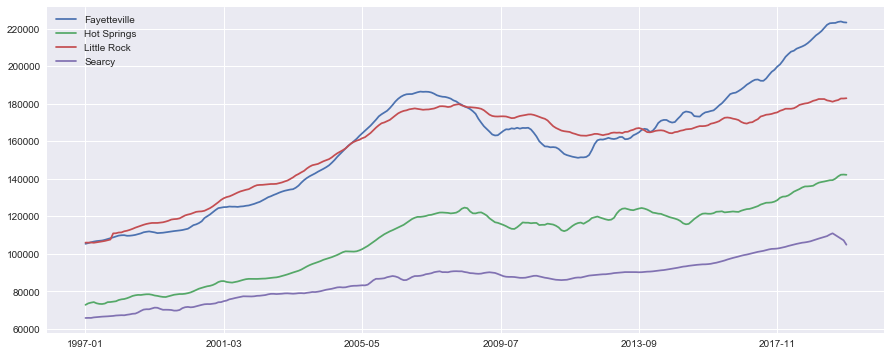

In [24]:
plt.style.use('seaborn')
for city in Arkansas_df.index:
    Arkansas_df.loc[city,:].plot(label=Arkansas_df.loc[city].name,figsize=(15,6))
    plt.legend(loc=2)

<div class="alert alert-block alert-info">
    <h2>Instruction:</h2>
    <h4>Using data from Zillow:</h4>
    <ul>
        <li>Develop model(s) for forecasting average median housing value by zip code for 2020</li>
        <li>Use the historical data from 1997 through 2019 as your training data</li>
        <li>Integrate data from other sources to improve base model(s)</li>
    </ul>
</div>

In [25]:
Crime.head()

CountyName State  crime_rate_per_100000  index  EDITION  PART  IDNO  \
0   Saint Louis City    MO            1791.995377      1        1     4  1612   
1  Crittenden County    AR            1754.914968      2        1     4   130   
2   Alexander County    IL            1664.700485      3        1     4   604   
3      Kenedy County    TX            1456.310680      4        1     4  2681   
4     De Soto Parish    LA            1447.402430      5        1     4  1137   

   CPOPARST  CPOPCRIM  AG_ARRST  AG_OFF  COVIND  INDEX  MODINDX  MURDER  RAPE  \
0    318667    318667        15      15   100.0   5706    22329     119   200   
1     50717     50717         4       4   100.0    873     3424       8    38   
2      8040      8040         2       2   100.0    127      278       1     2   
3       444       444         1       1   100.0      6       13       0     3   
4     26971     26971         3       3   100.0    392      703       3     4   

   ROBBERY  AGASSLT  BURGLRY  LARCENY  MVTHEFT  ARSON  population  FIPS_ST  \
0     1778     3609     4995    13791     3543    464      318416       29   
1      165      662     1482     1753      189     28       49746        5   
2        5      119       82      184       12      2        7629       17   
3        1        2        5        4        4      0         412       48   
4       17      368      149      494       60      0       27083       22   

   FIPS_CTY  TOT_CRIME  Crime_Rate  
0       510      28499    0.089502  
1        35       4325    0.086942  
2         3        407    0.053349  
3       261         19    0.046117  
4        31       1095    0.040431

In [26]:
#  Merging Crime Rate with Zillow Data
# To avoid conflict columns on merge
Crime1 = Crime[['CountyName','State','Crime_Rate']]

In [27]:
Crime1.shape

(3136, 3)

In [28]:
Crime1.head()

CountyName State  Crime_Rate
0   Saint Louis City    MO    0.089502
1  Crittenden County    AR    0.086942
2   Alexander County    IL    0.053349
3      Kenedy County    TX    0.046117
4     De Soto Parish    LA    0.040431

In [29]:
Crime1.describe()

Crime_Rate
count  3136.000000
mean      0.022505
std       0.013536
min       0.000000
25%       0.012714
50%       0.021056
75%       0.030293
max       0.089502

In [28]:
df = pd.merge(Zillow, Crime1, on=['CountyName', 'State'])

In [29]:
df.shape

(29688, 287)

In [30]:
df.head()

RegionID  RegionName      City State                        Metro  \
0     61639       10025  New York    NY  New York-Newark-Jersey City   
1     61637       10023  New York    NY  New York-Newark-Jersey City   
2     61616       10002  New York    NY  New York-Newark-Jersey City   
3     61630       10016  New York    NY  New York-Newark-Jersey City   
4     61643       10029  New York    NY  New York-Newark-Jersey City   

        CountyName  SizeRank  1997-01  1997-02  1997-03  1997-04  1997-05  \
0  New York County         1      NaN      NaN      NaN      NaN      NaN   
1  New York County         3      NaN      NaN      NaN      NaN      NaN   
2  New York County         7      NaN      NaN      NaN      NaN      NaN   
3  New York County        15      NaN      NaN      NaN      NaN      NaN   
4  New York County        25      NaN      NaN      NaN      NaN      NaN   

   1997-06  1997-07  1997-08  1997-09  1997-10  1997-11  1997-12  1998-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   1998-02  1998-03  1998-04  1998-05  1998-06  1998-07  1998-08  1998-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   1998-10  1998-11  1998-12  1999-01  1999-02  1999-03  1999-04  1999-05  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   1999-06  1999-07  1999-08  1999-09  1999-10  1999-11  1999-12  2000-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2000-02  2000-03  2000-04  2000-05  2000-06  2000-07  2000-08  2000-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2000-10  2000-11  2000-12  2001-01  2001-02  2001-03  2001-04  2001-05  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2001-06  2001-07  2001-08  2001-09  2001-10  2001-11  2001-12  2002-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN  

In [31]:
#  Merging Zillow Data with Crime Rate now with Median Household Income
# To avoid conflict columns on merge
Income1 = Income[['CountyName','State','MedInc']]

In [32]:
Income1.head()

CountyName State   MedInc
0         Alabama    AL  49881.0
1  Autauga County    AL  59338.0
2  Baldwin County    AL  57588.0
3  Barbour County    AL  34382.0
4     Bibb County    AL  46064.0

In [33]:
Income1.describe()

MedInc
count    3192.000000
mean    52942.078634
std     13880.017248
min     25385.000000
25%     43781.250000
50%     50738.000000
75%     59007.250000
max    140382.000000

In [34]:
df1 = pd.merge(df, Income1, on=['CountyName', 'State'])

In [35]:
df1.shape

(29519, 288)

In [36]:
276 * .60 # 276 number of columns from 1997-01 - 2019-12. will drop 40% missing rows which is 111.

165.6

In [37]:
df2 = df1.dropna(thresh=159) #Keep only the rows with at least 60% non-NA Values.

In [38]:
df2.shape

(23044, 288)

In [39]:
df2.head()

RegionID  RegionName      City State                        Metro  \
0     61639       10025  New York    NY  New York-Newark-Jersey City   
2     61616       10002  New York    NY  New York-Newark-Jersey City   
3     61630       10016  New York    NY  New York-Newark-Jersey City   
4     61643       10029  New York    NY  New York-Newark-Jersey City   
6     61625       10011  New York    NY  New York-Newark-Jersey City   

        CountyName  SizeRank  1997-01  1997-02  1997-03  1997-04  1997-05  \
0  New York County         1      NaN      NaN      NaN      NaN      NaN   
2  New York County         7      NaN      NaN      NaN      NaN      NaN   
3  New York County        15      NaN      NaN      NaN      NaN      NaN   
4  New York County        25      NaN      NaN      NaN      NaN      NaN   
6  New York County        30      NaN      NaN      NaN      NaN      NaN   

   1997-06  1997-07  1997-08  1997-09  1997-10  1997-11  1997-12  1998-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   1998-02  1998-03  1998-04  1998-05  1998-06  1998-07  1998-08  1998-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   1998-10  1998-11  1998-12  1999-01  1999-02  1999-03  1999-04  1999-05  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   1999-06  1999-07  1999-08  1999-09  1999-10  1999-11  1999-12  2000-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2000-02  2000-03  2000-04  2000-05  2000-06  2000-07  2000-08  2000-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2000-10  2000-11  2000-12  2001-01  2001-02  2001-03  2001-04  2001-05  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2001-06  2001-07  2001-08  2001-09  2001-10  2001-11  2001-12  2002-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN  

In [40]:
# Remove rows with Crime Rate >= 1.27%. Taken from 25% quantile of Crime Rate
df2 = df1[df1.Crime_Rate < .012714]

In [41]:
df2.shape

(3954, 288)

In [42]:
df2.head()

RegionID  RegionName          City State         Metro     CountyName  \
504     71831       32162  The Villages    FL  The Villages  Sumter County   
505     71829       32159  The Villages    FL  The Villages  Sumter County   
506    399570       32163  The Villages    FL  The Villages  Sumter County   
507     73219       34785      Wildwood    FL  The Villages  Sumter County   
508     72654       33513      Bushnell    FL  The Villages  Sumter County   

     SizeRank   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06  \
504        17  110461.0  109835.0  110114.0  109441.0  109542.0  109125.0   
505      1379  103108.0  105179.0  107211.0  108373.0  109059.0  109746.0   
506      1707       NaN       NaN       NaN       NaN       NaN       NaN   
507      7718   77344.0   77274.0   77154.0   76058.0   74774.0   73364.0   
508      8879   60914.0   61205.0   61456.0   62471.0   63503.0   64313.0   

      1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01  \
504  108455.0  107088.0  106187.0  106916.0  109140.0  111898.0  114024.0   
505  109921.0  110291.0  110775.0  111474.0  112133.0  112877.0  113641.0   
506       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
507   73350.0   73717.0   74527.0   75847.0   77062.0   77608.0   77042.0   
508   63744.0   63781.0   63763.0   64599.0   65436.0   66010.0   66609.0   

      1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08  \
504  115032.0  115404.0  115723.0  116237.0  116770.0  117497.0  118084.0   
505  114117.0  114330.0  114317.0  114554.0  114999.0  115471.0  115800.0   
506       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
507   76537.0   76829.0   77346.0   77775.0   78244.0   79047.0   79755.0   
508   66830.0   67110.0   66970.0   66878.0   67359.0   67675.0   68309.0   

      1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03  \
504  118753.0  119158.0  119310.0  118305.0  116922.0  115856.0  115771.0   
505  116368.0  117118.0  117772.0  118063.0  118023.0  118103.0  118388.0   
506       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
507   80020.0   80523.0   81039.0   81161.0   81213.0   81186.0   81286.0   
508   68801.0   69777.0   70124.0   69915.0   69779.0   69366.0   69968.0   

      1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10  \
504  116149.0  116501.0  117088.0  117648.0  118027.0  118849.0  119655.0   
505  118719.0  119327.0  120027.0  121029.0  121749.0  122540.0  123241.0   
506       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
507   80739.0   80466.0   80444.0   80483.0   80788.0   80991.0   81554.0   
508   69825.0   69853.0   69087.0   68828.0   68260.0   68044.0   67853.0   

      1999-11   1999-12   2000-01   2000-02   2000-03   2000-04   2000-05  \
504  120815.0  121612.0  122775.0  123825.0  124666.0  125435.0  126434.0   
505  124075.0  124799.0  125343.0  125799.0  126055.0  126576.0  127192.0   
506       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
507   81937.0   82534.0   82730.0   82750.0   82982.0   83481.0   83970.0   
508   68749.0   69924.0   71122.0   72141.0   72409.0   72947.0   73054.0   

      2000-06   2000-07   2000-08   2000-09   2000-10   2000-11   2000-12  \
504  127636.0  129023.0  130085.0  131005.0  131528.0  132272.0  133126.0   
505  127826.0  128326.0  128706.0  129272.0  129999.0  130834.0  131610.0   
506       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
507   84129.0   84832.0   85136.0   85315.0   85034.0   85446.0   85839.0   
508   74083.0   75329.0   77061.0   78389.0   78739.0   78200.0   77406.0   

      2001-01   2001-02   2001-03   2001-04   2001-05   2001-06   2001-07  \
504  134022.0  134824.0  135618.0  136595.0  137685.0  138764.0  139788.0   
505  132169.0  132658.0  133357.0  134139.0  134947.0  135456.0  135983.0   
506       NaN       NaN       NaN       NaN       NaN       NaN 

In [43]:
# Remove rows with Median Income 2018 <= 59000. Taken from 75% quantile of Median Household Income
df3 = df2[df2.MedInc > 59000]

In [44]:
df3.shape

(1151, 288)

In [45]:
df3[['RegionName','Metro','CountyName','City','State','std','mean','Growth']].head()

RegionName                   Metro      CountyName             City  \
1876       80134  Denver-Aurora-Lakewood  Douglas County           Parker   
1877       80126  Denver-Aurora-Lakewood  Douglas County  Highlands Ranch   
1878       80104  Denver-Aurora-Lakewood  Douglas County      Castle Rock   
1879       80138  Denver-Aurora-Lakewood  Douglas County           Parker   
1880       80129  Denver-Aurora-Lakewood  Douglas County  Highlands Ranch   

     State           std           mean    Growth  
1876    CO  66925.848373  404962.941667  1.328541  
1877    CO  77070.390351  435366.933333  1.512092  
1878    CO  67535.028870  335624.800000  1.383615  
1879    CO  73452.448249  417775.300000  1.456492  
1880    CO  66538.786023  388344.558333  1.515008

In [46]:
#Descriptive statistics of ROI.
print(df3.Growth.describe())


count    342.000000
mean       1.095689
std        0.477641
min        0.122368
25%        0.742719
50%        0.985677
75%        1.406681
max        2.744479
Name: Growth, dtype: float64


In [47]:
best10=df3.nlargest(10, ['Growth']) 
print('\n Best 10 Zipcodes:')
best10[['RegionName','Metro','CountyName','City','State','Growth','std','mean']]


 Best 10 Zipcodes:


RegionName                             Metro         CountyName  \
28245       98651      Portland-Vancouver-Hillsboro    Skamania County   
27363       80482                               NaN       Grand County   
20006       20144   Washington-Arlington-Alexandria    Fauquier County   
21239       55074  Minneapolis-St. Paul-Bloomington     Chisago County   
21237       55069  Minneapolis-St. Paul-Bloomington     Chisago County   
17861       97041                        Hood River  Hood River County   
21238       55032  Minneapolis-St. Paul-Bloomington     Chisago County   
19144       83442                       Idaho Falls   Jefferson County   
17860       97031                        Hood River  Hood River County   
27362       80447                               NaN       Grand County   

                      City State    Growth           std           mean  
28245            Underwood    WA  2.744479  86548.903408  372800.925000  
27363          Winter Park    CO  2.490861  98718.041136  470620.433333  
20006            Delaplane    VA  2.468982  68402.012014  558770.791667  
21239               Shafer    MN  2.353474  31500.079045  193209.441667  
21237            Rush City    MN  2.310456  28099.555029  163006.958333  
17861  Mount Hood Parkdale    OR  2.230471  68928.748286  338221.266667  
21238               Harris    MN  2.214750  40093.706509  201372.283333  
19144                Rigby    ID  2.179051  40767.972766  197067.866667  
17860           Hood River    OR  2.175693  73846.796956  353977.675000  
27362           Grand Lake    CO  2.130602  58312.946847  339919.325000

In [48]:
best10

RegionID  RegionName                 City State  \
28245     99945       98651            Underwood    WA   
27363     93426       80482          Winter Park    CO   
20006     66240       20144            Delaplane    VA   
21239     82086       55074               Shafer    MN   
21237     82081       55069            Rush City    MN   
17861     99045       97041  Mount Hood Parkdale    OR   
21238     82054       55032               Harris    MN   
19144     94167       83442                Rigby    ID   
17860     99035       97031           Hood River    OR   
27362     93397       80447           Grand Lake    CO   

                                  Metro         CountyName  SizeRank  \
28245      Portland-Vancouver-Hillsboro    Skamania County     22693   
27363                               NaN       Grand County     15679   
20006   Washington-Arlington-Alexandria    Fauquier County     21925   
21239  Minneapolis-St. Paul-Bloomington     Chisago County     18169   
21237  Minneapolis-St. Paul-Bloomington     Chisago County     13351   
17861                        Hood River  Hood River County     16248   
21238  Minneapolis-St. Paul-Bloomington     Chisago County     15468   
19144                       Idaho Falls   Jefferson County      7026   
17860                        Hood River  Hood River County      6089   
27362                               NaN       Grand County     15011   

        1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07  \
28245  141910.0  142060.0  142424.0  142861.0  143423.0  144306.0  144663.0   
27363  193674.0  194821.0  195546.0  196047.0  196527.0  197410.0  198365.0   
20006  195129.0  196220.0  196343.0  196905.0  197745.0  199136.0  199748.0   
21239   76048.0   76177.0   76084.0   76137.0   76483.0   76929.0   77322.0   
21237   66032.0   66323.0   66384.0   66490.0   66515.0   66624.0   66839.0   
17861  142773.0  143591.0  144916.0  145167.0  145763.0  145797.0  146674.0   
21238   87320.0   87134.0   87512.0   87847.0   88523.0   88717.0   88839.0   
19144   89941.0   90694.0   91167.0   91532.0   91879.0   92310.0   92666.0   
17860  153000.0  153755.0  154520.0  154816.0  155274.0  155803.0  156783.0   
27362  144944.0  145490.0  146627.0  148190.0  149147.0  149814.0  150054.0   

        1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02  \
28245  144471.0  144331.0  143932.0  144024.0  144452.0  145494.0  146223.0   
27363  200846.0  203521.0  206153.0  207093.0  207553.0  208255.0  209088.0   
20006  201797.0  203983.0  206873.0  208441.0  210580.0  211842.0  211145.0   
21239   77473.0   77538.0   77984.0   78476.0   79202.0   79946.0   80919.0   
21237   67199.0   67838.0   68396.0   68881.0   69422.0   70053.0   70854.0   
17861  147508.0  148923.0  150109.0  151218.0  151928.0  152328.0  152360.0   
21238   89136.0   89711.0   90409.0   91014.0   91904.0   93360.0   93867.0   
19144   92949.0   93586.0   95095.0   96499.0   97780.0   98458.0   99699.0   
17860  157457.0  158033.0  158425.0  159326.0  160349.0  160136.0  159586.0   
27362  150824.0  151443.0  152310.0  153242.0  154611.0  156747.0  160507.0   

        1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09  \
28245  146119.0  145606.0  145486.0  145666.0  146116.0  146096.0  146131.0   
27363  211525.0  214385.0  215891.0  216049.0  216208.0  218423.0  220390.0   
20006  208191.0  206489.0  207360.0  211313.0  213776.0  214402.0  213547.0   
21239   82136.0   82070.0   82016.0   81257.0   81686.0   80952.0   80396.0   
21237   71276.0   72344.0   73622.0   75533.0   76064.0   76272.0   76124.0   
17861  152103.0  152951.0  154939.0  156351.0  156194.0  154893.0  155648.0   
21238   93037.0   92214.0   92221.0   93348.0   94513.0   95513.0   96243.0   
19144  101304.0  101275.0  101404.0  101478.0  102541.0  103296.0  104336.0   
17860  158794.0  158387.0  158409.0  158696.0  159595.0  160041.0  160172.0   
27362  163447.0  167136.0  170206.0  171977.0

In [49]:
not_for_model = ["RegionID","City","State","Metro","CountyName","SizeRank","Crime_Rate","MedInc","Growth","std","mean"]
for_model = best10.iloc[:,best10.columns.isin(not_for_model) == False]

In [50]:
for_model

RegionName   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06  \
28245       98651  141910.0  142060.0  142424.0  142861.0  143423.0  144306.0   
27363       80482  193674.0  194821.0  195546.0  196047.0  196527.0  197410.0   
20006       20144  195129.0  196220.0  196343.0  196905.0  197745.0  199136.0   
21239       55074   76048.0   76177.0   76084.0   76137.0   76483.0   76929.0   
21237       55069   66032.0   66323.0   66384.0   66490.0   66515.0   66624.0   
17861       97041  142773.0  143591.0  144916.0  145167.0  145763.0  145797.0   
21238       55032   87320.0   87134.0   87512.0   87847.0   88523.0   88717.0   
19144       83442   89941.0   90694.0   91167.0   91532.0   91879.0   92310.0   
17860       97031  153000.0  153755.0  154520.0  154816.0  155274.0  155803.0   
27362       80447  144944.0  145490.0  146627.0  148190.0  149147.0  149814.0   

        1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01  \
28245  144663.0  144471.0  144331.0  143932.0  144024.0  144452.0  145494.0   
27363  198365.0  200846.0  203521.0  206153.0  207093.0  207553.0  208255.0   
20006  199748.0  201797.0  203983.0  206873.0  208441.0  210580.0  211842.0   
21239   77322.0   77473.0   77538.0   77984.0   78476.0   79202.0   79946.0   
21237   66839.0   67199.0   67838.0   68396.0   68881.0   69422.0   70053.0   
17861  146674.0  147508.0  148923.0  150109.0  151218.0  151928.0  152328.0   
21238   88839.0   89136.0   89711.0   90409.0   91014.0   91904.0   93360.0   
19144   92666.0   92949.0   93586.0   95095.0   96499.0   97780.0   98458.0   
17860  156783.0  157457.0  158033.0  158425.0  159326.0  160349.0  160136.0   
27362  150054.0  150824.0  151443.0  152310.0  153242.0  154611.0  156747.0   

        1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08  \
28245  146223.0  146119.0  145606.0  145486.0  145666.0  146116.0  146096.0   
27363  209088.0  211525.0  214385.0  215891.0  216049.0  216208.0  218423.0   
20006  211145.0  208191.0  206489.0  207360.0  211313.0  213776.0  214402.0   
21239   80919.0   82136.0   82070.0   82016.0   81257.0   81686.0   80952.0   
21237   70854.0   71276.0   72344.0   73622.0   75533.0   76064.0   76272.0   
17861  152360.0  152103.0  152951.0  154939.0  156351.0  156194.0  154893.0   
21238   93867.0   93037.0   92214.0   92221.0   93348.0   94513.0   95513.0   
19144   99699.0  101304.0  101275.0  101404.0  101478.0  102541.0  103296.0   
17860  159586.0  158794.0  158387.0  158409.0  158696.0  159595.0  160041.0   
27362  160507.0  163447.0  167136.0  170206.0  171977.0  172639.0  171095.0   

        1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03  \
28245  146131.0  146172.0  146661.0  145471.0  143526.0  141554.0  142061.0   
27363  220390.0  221897.0  223252.0  227013.0  232059.0  236560.0  238088.0   
20006  213547.0  214193.0  214764.0  216340.0  217844.0  220715.0  223306.0   
21239   80396.0   79478.0   79558.0   81039.0   82205.0   83088.0   82987.0   
21237   76124.0   76711.0   77462.0   78500.0   79503.0   80049.0   80310.0   
17861  155648.0  156361.0  158553.0  159590.0  161155.0  161663.0  163732.0   
21238   96243.0   96716.0   97471.0   98680.0   99198.0  100387.0  101480.0   
19144  104336.0  106937.0  109304.0  110350.0  109969.0  109814.0  110006.0   
17860  160172.0  160458.0  160861.0  161343.0  161480.0  161959.0  162416.0   
27362  170819.0  172073.0  174120.0  176296.0  174767.0  173245.0  171404.0   

        1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10  \
28245  143578.0  145020.0  145847.0  146066.0  146303.0  146217.0  146608.0   
27363  240983.0  244716.0  249599.0  252461.0  255318.0  258353.0  261232.0   
20006  227654.0  230257.0  232633.0  232500.0  233425.0  234808.0  234430.0   
21239   84456.0   86775.0   89044.0   90728.0   92120.0   93385.0   93747.0   
21237   80505.0   81707.0   83512.0   85638.0   87016.0   87883.0   88550.0   
17861  165143.0  166569.0  1661

In [51]:
# Resetting dates as index
for_model = for_model.T.reset_index()
for_model

index     28245     27363     20006     21239     21237     17861  \
0    RegionName   98651.0   80482.0   20144.0   55074.0   55069.0   97041.0   
1       1997-01  141910.0  193674.0  195129.0   76048.0   66032.0  142773.0   
2       1997-02  142060.0  194821.0  196220.0   76177.0   66323.0  143591.0   
3       1997-03  142424.0  195546.0  196343.0   76084.0   66384.0  144916.0   
4       1997-04  142861.0  196047.0  196905.0   76137.0   66490.0  145167.0   
5       1997-05  143423.0  196527.0  197745.0   76483.0   66515.0  145763.0   
6       1997-06  144306.0  197410.0  199136.0   76929.0   66624.0  145797.0   
7       1997-07  144663.0  198365.0  199748.0   77322.0   66839.0  146674.0   
8       1997-08  144471.0  200846.0  201797.0   77473.0   67199.0  147508.0   
9       1997-09  144331.0  203521.0  203983.0   77538.0   67838.0  148923.0   
10      1997-10  143932.0  206153.0  206873.0   77984.0   68396.0  150109.0   
11      1997-11  144024.0  207093.0  208441.0   78476.0   68881.0  151218.0   
12      1997-12  144452.0  207553.0  210580.0   79202.0   69422.0  151928.0   
13      1998-01  145494.0  208255.0  211842.0   79946.0   70053.0  152328.0   
14      1998-02  146223.0  209088.0  211145.0   80919.0   70854.0  152360.0   
15      1998-03  146119.0  211525.0  208191.0   82136.0   71276.0  152103.0   
16      1998-04  145606.0  214385.0  206489.0   82070.0   72344.0  152951.0   
17      1998-05  145486.0  215891.0  207360.0   82016.0   73622.0  154939.0   
18      1998-06  145666.0  216049.0  211313.0   81257.0   75533.0  156351.0   
19      1998-07  146116.0  216208.0  213776.0   81686.0   76064.0  156194.0   
20      1998-08  146096.0  218423.0  214402.0   80952.0   76272.0  154893.0   
21      1998-09  146131.0  220390.0  213547.0   80396.0   76124.0  155648.0   
22      1998-10  146172.0  221897.0  214193.0   79478.0   76711.0  156361.0   
23      1998-11  146661.0  223252.0  214764.0   79558.0   77462.0  158553.0   
24      1998-12  145471.0  227013.0  216340.0   81039.0   78500.0  159590.0   
25      1999-01  143526.0  232059.0  217844.0   82205.0   79503.0  161155.0   
26      1999-02  141554.0  236560.0  220715.0   83088.0   80049.0  161663.0   
27      1999-03  142061.0  238088.0  223306.0   82987.0   80310.0  163732.0   
28      1999-04  143578.0  240983.0  227654.0   84456.0   80505.0  165143.0   
29      1999-05  145020.0  244716.0  230257.0   86775.0   81707.0  166569.0   
30      1999-06  145847.0  249599.0  232633.0   89044.0   83512.0  166150.0   
31      1999-07  146066.0  252461.0  232500.0   90728.0   85638.0  166729.0   
32      1999-08  146303.0  255318.0  233425.0   92120.0   87016.0  166898.0   
33      1999-09  146217.0  258353.0  234808.0   93385.0   87883.0  167640.0   
34      1999-10  146608.0  261232.0  234430.0   93747.0   88550.0  168803.0   
35      1999-11  147056.0  264240.0  232998.0   93608.0   89521.0  169942.0   
36      1999-12  148197.0  269492.0  231533.0   93856.0   90484.0  171510.0   
37      2000-01  148598.0  276460.0  231704.0   94932.0   91484.0  172048.0   
38      2000-02  149999.0  282502.0  232838.0   95703.0   92120.0  172770.0   
39      2000-03  150984.0  287375.0  231690.0   96086.0   92868.0  173098.0   
40      2000-04  152422.0  291275.0  231046.0   96536.0   93444.0  174396.0   
41      2000-05  152630.0  296105.0  230889.0   97167.0   94134.0  175894.0   
42      2000-06  153145.0  300102.0  230585.0   98638.0   95143.0  177373.0   
43      2000-07  153150.0  304055.0  228564.0   99603.0   96149.0  178304.0   
44      2000-08  154408.0  306932.0  226279.0  101253.0   97223.0  178565.0   
45      2000-09  155718.0  309607.0  225907.0  103534.0   97930.0  178403.0   
46      2000-10  158835.0  311951.0  228717.0  106282.0   98661.0  178352.0   
47      2000-11  161443.0  315138.0  232262.0  109180.0   99912.0  179587.0   
48      2000-12  163500.0  317575.0  236986.0  111024.0  101359.0  180931.0   
49      2001-01  164620.0  319557.0  241635.0  112613.0  103

In [52]:
for_model = for_model.rename(columns={"index":"ds",28245:"98651",27363:"80482",20006:"20144",21239:"55074",21237:"55069",
                        17861:"97041",21238:"55032",19144:"83442",17860:"97031",27362:"80447"})
for_model = for_model.iloc[1:,:]

In [53]:
for_model

ds     98651     80482     20144     55074     55069     97041  \
1    1997-01  141910.0  193674.0  195129.0   76048.0   66032.0  142773.0   
2    1997-02  142060.0  194821.0  196220.0   76177.0   66323.0  143591.0   
3    1997-03  142424.0  195546.0  196343.0   76084.0   66384.0  144916.0   
4    1997-04  142861.0  196047.0  196905.0   76137.0   66490.0  145167.0   
5    1997-05  143423.0  196527.0  197745.0   76483.0   66515.0  145763.0   
6    1997-06  144306.0  197410.0  199136.0   76929.0   66624.0  145797.0   
7    1997-07  144663.0  198365.0  199748.0   77322.0   66839.0  146674.0   
8    1997-08  144471.0  200846.0  201797.0   77473.0   67199.0  147508.0   
9    1997-09  144331.0  203521.0  203983.0   77538.0   67838.0  148923.0   
10   1997-10  143932.0  206153.0  206873.0   77984.0   68396.0  150109.0   
11   1997-11  144024.0  207093.0  208441.0   78476.0   68881.0  151218.0   
12   1997-12  144452.0  207553.0  210580.0   79202.0   69422.0  151928.0   
13   1998-01  145494.0  208255.0  211842.0   79946.0   70053.0  152328.0   
14   1998-02  146223.0  209088.0  211145.0   80919.0   70854.0  152360.0   
15   1998-03  146119.0  211525.0  208191.0   82136.0   71276.0  152103.0   
16   1998-04  145606.0  214385.0  206489.0   82070.0   72344.0  152951.0   
17   1998-05  145486.0  215891.0  207360.0   82016.0   73622.0  154939.0   
18   1998-06  145666.0  216049.0  211313.0   81257.0   75533.0  156351.0   
19   1998-07  146116.0  216208.0  213776.0   81686.0   76064.0  156194.0   
20   1998-08  146096.0  218423.0  214402.0   80952.0   76272.0  154893.0   
21   1998-09  146131.0  220390.0  213547.0   80396.0   76124.0  155648.0   
22   1998-10  146172.0  221897.0  214193.0   79478.0   76711.0  156361.0   
23   1998-11  146661.0  223252.0  214764.0   79558.0   77462.0  158553.0   
24   1998-12  145471.0  227013.0  216340.0   81039.0   78500.0  159590.0   
25   1999-01  143526.0  232059.0  217844.0   82205.0   79503.0  161155.0   
26   1999-02  141554.0  236560.0  220715.0   83088.0   80049.0  161663.0   
27   1999-03  142061.0  238088.0  223306.0   82987.0   80310.0  163732.0   
28   1999-04  143578.0  240983.0  227654.0   84456.0   80505.0  165143.0   
29   1999-05  145020.0  244716.0  230257.0   86775.0   81707.0  166569.0   
30   1999-06  145847.0  249599.0  232633.0   89044.0   83512.0  166150.0   
31   1999-07  146066.0  252461.0  232500.0   90728.0   85638.0  166729.0   
32   1999-08  146303.0  255318.0  233425.0   92120.0   87016.0  166898.0   
33   1999-09  146217.0  258353.0  234808.0   93385.0   87883.0  167640.0   
34   1999-10  146608.0  261232.0  234430.0   93747.0   88550.0  168803.0   
35   1999-11  147056.0  264240.0  232998.0   93608.0   89521.0  169942.0   
36   1999-12  148197.0  269492.0  231533.0   93856.0   90484.0  171510.0   
37   2000-01  148598.0  276460.0  231704.0   94932.0   91484.0  172048.0   
38   2000-02  149999.0  282502.0  232838.0   95703.0   92120.0  172770.0   
39   2000-03  150984.0  287375.0  231690.0   96086.0   92868.0  173098.0   
40   2000-04  152422.0  291275.0  231046.0   96536.0   93444.0  174396.0   
41   2000-05  152630.0  296105.0  230889.0   97167.0   94134.0  175894.0   
42   2000-06  153145.0  300102.0  230585.0   98638.0   95143.0  177373.0   
43   2000-07  153150.0  304055.0  228564.0   99603.0   96149.0  178304.0   
44   2000-08  154408.0  306932.0  226279.0  101253.0   97223.0  178565.0   
45   2000-09  155718.0  309607.0  225907.0  103534.0   97930.0  178403.0   
46   2000-10  158835.0  311951.0  228717.0  106282.0   98661.0  178352.0   
47   2000-11  161443.0  315138.0  232262.0  109180.0   99912.0  179587.0   
48   2000-12  163500.0  317575.0  236986.0  111024.0  101359.0  180931.0   
49   2001-01  164620.0  319557.0  241635.0  112613.0  103103.0  182207.0   
50   2001-02  167244.0  321639.0  246882.0  113977.0  104438.0  182823.0   
51   2001-03  170253.0  324572.0  250062.0  115069.0  105331.0  182567.0   
52   2001-04  174016.0  327354.0  252697.0  115903.0  1059

In [54]:
#convert index to datetime
for_model['ds'] = pd.to_datetime(for_model['ds'])

In [55]:
for_model

ds     98651     80482     20144     55074     55069     97041  \
1   1997-01-01  141910.0  193674.0  195129.0   76048.0   66032.0  142773.0   
2   1997-02-01  142060.0  194821.0  196220.0   76177.0   66323.0  143591.0   
3   1997-03-01  142424.0  195546.0  196343.0   76084.0   66384.0  144916.0   
4   1997-04-01  142861.0  196047.0  196905.0   76137.0   66490.0  145167.0   
5   1997-05-01  143423.0  196527.0  197745.0   76483.0   66515.0  145763.0   
6   1997-06-01  144306.0  197410.0  199136.0   76929.0   66624.0  145797.0   
7   1997-07-01  144663.0  198365.0  199748.0   77322.0   66839.0  146674.0   
8   1997-08-01  144471.0  200846.0  201797.0   77473.0   67199.0  147508.0   
9   1997-09-01  144331.0  203521.0  203983.0   77538.0   67838.0  148923.0   
10  1997-10-01  143932.0  206153.0  206873.0   77984.0   68396.0  150109.0   
11  1997-11-01  144024.0  207093.0  208441.0   78476.0   68881.0  151218.0   
12  1997-12-01  144452.0  207553.0  210580.0   79202.0   69422.0  151928.0   
13  1998-01-01  145494.0  208255.0  211842.0   79946.0   70053.0  152328.0   
14  1998-02-01  146223.0  209088.0  211145.0   80919.0   70854.0  152360.0   
15  1998-03-01  146119.0  211525.0  208191.0   82136.0   71276.0  152103.0   
16  1998-04-01  145606.0  214385.0  206489.0   82070.0   72344.0  152951.0   
17  1998-05-01  145486.0  215891.0  207360.0   82016.0   73622.0  154939.0   
18  1998-06-01  145666.0  216049.0  211313.0   81257.0   75533.0  156351.0   
19  1998-07-01  146116.0  216208.0  213776.0   81686.0   76064.0  156194.0   
20  1998-08-01  146096.0  218423.0  214402.0   80952.0   76272.0  154893.0   
21  1998-09-01  146131.0  220390.0  213547.0   80396.0   76124.0  155648.0   
22  1998-10-01  146172.0  221897.0  214193.0   79478.0   76711.0  156361.0   
23  1998-11-01  146661.0  223252.0  214764.0   79558.0   77462.0  158553.0   
24  1998-12-01  145471.0  227013.0  216340.0   81039.0   78500.0  159590.0   
25  1999-01-01  143526.0  232059.0  217844.0   82205.0   79503.0  161155.0   
26  1999-02-01  141554.0  236560.0  220715.0   83088.0   80049.0  161663.0   
27  1999-03-01  142061.0  238088.0  223306.0   82987.0   80310.0  163732.0   
28  1999-04-01  143578.0  240983.0  227654.0   84456.0   80505.0  165143.0   
29  1999-05-01  145020.0  244716.0  230257.0   86775.0   81707.0  166569.0   
30  1999-06-01  145847.0  249599.0  232633.0   89044.0   83512.0  166150.0   
31  1999-07-01  146066.0  252461.0  232500.0   90728.0   85638.0  166729.0   
32  1999-08-01  146303.0  255318.0  233425.0   92120.0   87016.0  166898.0   
33  1999-09-01  146217.0  258353.0  234808.0   93385.0   87883.0  167640.0   
34  1999-10-01  146608.0  261232.0  234430.0   93747.0   88550.0  168803.0   
35  1999-11-01  147056.0  264240.0  232998.0   93608.0   89521.0  169942.0   
36  1999-12-01  148197.0  269492.0  231533.0   93856.0   90484.0  171510.0   
37  2000-01-01  148598.0  276460.0  231704.0   94932.0   91484.0  172048.0   
38  2000-02-01  149999.0  282502.0  232838.0   95703.0   92120.0  172770.0   
39  2000-03-01  150984.0  287375.0  231690.0   96086.0   92868.0  173098.0   
40  2000-04-01  152422.0  291275.0  231046.0   96536.0   93444.0  174396.0   
41  2000-05-01  152630.0  296105.0  230889.0   97167.0   94134.0  175894.0   
42  2000-06-01  153145.0  300102.0  230585.0   98638.0   95143.0  177373.0   
43  2000-07-01  153150.0  304055.0  228564.0   99603.0   96149.0  178304.0   
44  2000-08-01  154408.0  306932.0  226279.0  101253.0   97223.0  178565.0   
45  2000-09-01  155718.0  309607.0  225907.0  103534.0   97930.0  178403.0   
46  2000-10-01  158835.0  311951.0  228717.0  106282.0   98661.0  178352.0   
47  2000-11-01  161443.0  315138.0  232262.0  109180.0   99912.0  179587.0   
48  2000-12-01  163500.0  317575.0  236986.0  111024.0  101359.0  180931.0   
49  2001-01-01  164620.0  319557.0  241635.0  112613.0  103103.0  182207.0   
50  2001-02-01  167244.0  321639.0  246882.0  113977.0  104438.0  182823.0   
51  2001-03-01  170253.0  324572.0

#### For Zip 98651

In [56]:
zip_98651 = for_model.loc[:,['ds','98651']]

In [57]:
zip_98651.rename(columns={'98651':'y'}, inplace=True)

In [58]:
model_98651=Prophet(interval_width=0.95)
model_98651.fit(zip_98651);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [59]:
future=model_98651.make_future_dataframe(periods=13,freq="M",include_history=True)

In [60]:
forecast_98651=model_98651.predict(future)
forecast_98651.head()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 1997-01-01  143267.101686  137323.276247  149647.456703  143267.101686   
1 1997-02-01  143338.520388  137646.366460  149348.911867  143338.520388   
2 1997-03-01  143403.027603  136859.093593  149245.304802  143403.027603   
3 1997-04-01  143474.446305  137654.108567  149785.290537  143474.446305   
4 1997-05-01  143543.561178  137703.071417  149977.465298  143543.561178   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  143267.101686      214.318650            214.318650            214.318650   
1  143338.520388      201.526056            201.526056            201.526056   
2  143403.027603      -19.422801            -19.422801            -19.422801   
3  143474.446305       90.791804             90.791804             90.791804   
4  143543.561178      220.336254            220.336254            220.336254   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  214.318650    214.318650    214.318650                   0.0   
1  201.526056    201.526056    201.526056                   0.0   
2  -19.422801    -19.422801    -19.422801                   0.0   
3   90.791804     90.791804     90.791804                   0.0   
4  220.336254    220.336254    220.336254                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  143481.420335  
1                         0.0                         0.0  143540.046444  
2                         0.0                         0.0  143383.604801  
3                         0.0                         0.0  143565.238109  
4                         0.0                         0.0  143763.897433

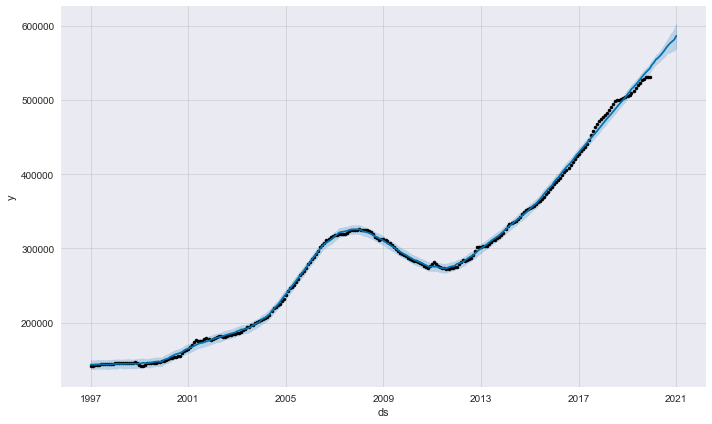

In [61]:
model_98651.plot(forecast_98651);

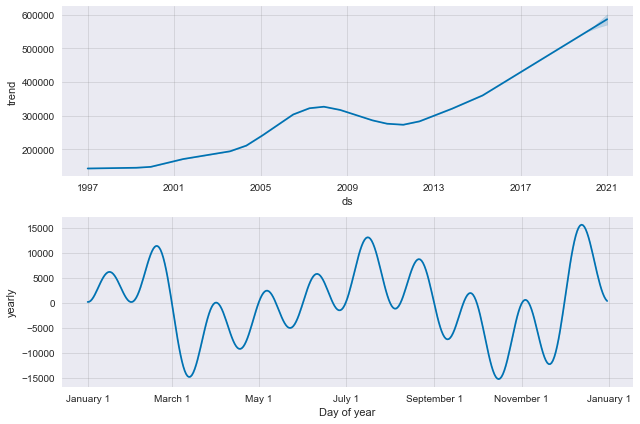

In [62]:
model_98651.plot_components(forecast_98651);

In [63]:
from fbprophet.diagnostics import cross_validation
cv_98651= cross_validation(model_98651, initial = pd.to_timedelta(204,unit="M"), horizon = pd.to_timedelta(12,unit="M"),
                        period = pd.to_timedelta(12,unit="M"))

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-11-30 18:54:00 and 2018-11-30 18:10:48
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\

In [64]:
cv_98651.tail()

ds           yhat     yhat_lower     yhat_upper         y  \
56 2019-08-01  533502.526978  522581.544974  543665.361643  526417.0   
57 2019-09-01  537235.067388  526101.379189  548228.972659  528292.0   
58 2019-10-01  540395.846503  526070.100361  553304.137712  530505.0   
59 2019-11-01  543494.384655  528230.037081  559013.357320  530538.0   
60 2019-12-01  546731.548894  529929.437367  563748.505185  531379.0   

                cutoff  
56 2018-11-30 18:10:48  
57 2018-11-30 18:10:48  
58 2018-11-30 18:10:48  
59 2018-11-30 18:10:48  
60 2018-11-30 18:10:48

In [65]:
from fbprophet.diagnostics import performance_metrics
performance_98651 = performance_metrics(cv_98651)
performance_98651.tail()

horizon           mse          rmse           mae      mape  \
51 335 days 11:38:24  2.863520e+08  16921.937481  15869.767799  0.034731   
52 335 days 17:27:36  4.074279e+08  20184.843148  18753.191081  0.041110   
53 335 days 23:16:48  3.158582e+08  17772.398982  16717.753430  0.037412   
54 365 days 05:06:00  3.265047e+08  18069.441587  17044.923431  0.038793   
55 365 days 05:49:12  3.286059e+08  18127.490687  17114.295436  0.037053   

    coverage  
51  0.333333  
52  0.333333  
53  0.333333  
54  0.333333  
55  0.500000

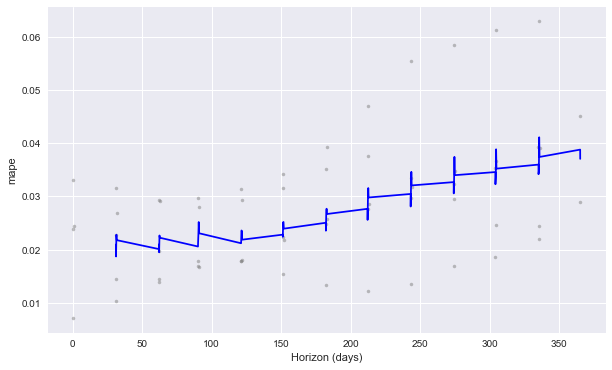

In [66]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_98651, metric='mape')

#### For Zip 80482

In [67]:
zip_80482 = for_model.loc[:,['ds','80482']]

In [68]:
zip_80482.rename(columns={'80482':'y'}, inplace=True)

In [69]:
model_80482=Prophet(interval_width=0.95)
model_80482.fit(zip_80482);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [70]:
forecast_80482=model_80482.predict(future)
forecast_80482.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
284 2020-08-31  720716.385084  707289.148998  735360.319280  713414.225060   
285 2020-09-30  725055.129906  711367.224188  739492.451564  716088.227433   
286 2020-10-31  729538.499555  713269.057488  743349.390755  719137.890995   
287 2020-11-30  733877.244377  717832.679990  748737.199741  722179.282814   
288 2020-12-31  738360.614026  723217.090734  755918.011067  725373.976390   

       trend_upper  additive_terms  additive_terms_lower  \
284  727935.923612      159.694742            159.694742   
285  733121.658017      152.944339            152.944339   
286  738872.073721     -449.321660           -449.321660   
287  744348.105690     -920.412608           -920.412608   
288  749892.877683      214.040117            214.040117   

     additive_terms_upper      yearly  yearly_lower  yearly_upper  \
284            159.694742  159.694742    159.694742    159.694742   
285            152.944339  152.944339    152.944339    152.944339   
286           -449.321660 -449.321660   -449.321660   -449.321660   
287           -920.412608 -920.412608   -920.412608   -920.412608   
288            214.040117  214.040117    214.040117    214.040117   

     multiplicative_terms  multiplicative_terms_lower  \
284                   0.0                         0.0   
285                   0.0                         0.0   
286                   0.0                         0.0   
287                   0.0                         0.0   
288                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
284                         0.0  720876.079826  
285                         0.0  725208.074245  
286                         0.0  729089.177895  
287                         0.0  732956.831768  
288                         0.0  738574.654143

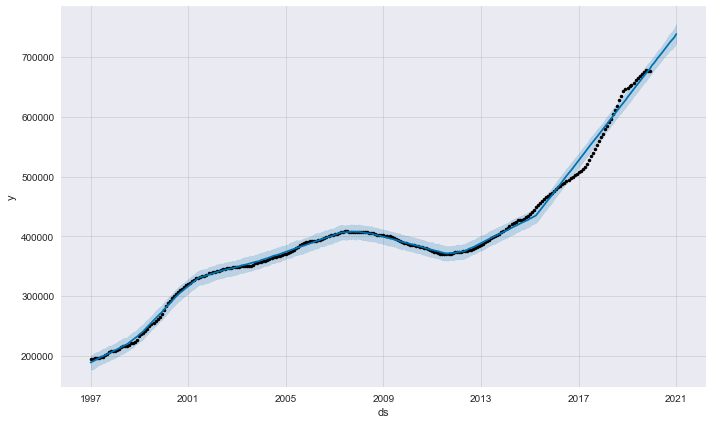

In [71]:
model_80482.plot(forecast_80482);

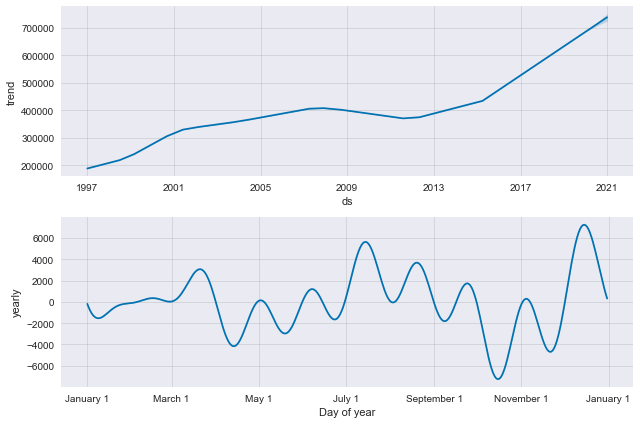

In [72]:
model_80482.plot_components(forecast_80482);

In [73]:
from fbprophet.diagnostics import cross_validation
cv_80482= cross_validation(model_80482, initial = pd.to_timedelta(204,unit="M"), horizon = pd.to_timedelta(12,unit="M"),
                        period = pd.to_timedelta(12,unit="M"))

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-11-30 18:54:00 and 2018-11-30 18:10:48
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\

In [74]:
cv_80482.head()

ds           yhat     yhat_lower     yhat_upper         y  \
0 2014-12-01  424874.507160  418864.965045  430559.519956  434337.0   
1 2015-01-01  426543.389128  420362.781547  432616.927757  437197.0   
2 2015-02-01  427855.150429  421089.615292  433594.114030  440469.0   
3 2015-03-01  429795.590568  423286.864930  435880.314068  444700.0   
4 2015-04-01  431506.223641  424233.831005  437928.246854  448256.0   

               cutoff  
0 2014-11-30 18:54:00  
1 2014-11-30 18:54:00  
2 2014-11-30 18:54:00  
3 2014-11-30 18:54:00  
4 2014-11-30 18:54:00

In [75]:
from fbprophet.diagnostics import performance_metrics
performance_80482 = performance_metrics(cv_80482)
performance_80482.head()

horizon           mse          rmse           mae      mape  \
0 31 days 05:06:00  3.643543e+08  19088.065695  15400.092655  0.028253   
1 31 days 05:49:12  5.522473e+08  23499.941867  19637.018660  0.033589   
2 31 days 11:38:24  4.473150e+08  21149.823088  17970.094349  0.031892   
3 31 days 17:27:36  3.550155e+08  18841.854974  14559.646185  0.025980   
4 61 days 23:16:48  3.656908e+08  19123.043030  15457.662150  0.027912   

   coverage  
0  0.166667  
1  0.166667  
2  0.166667  
3  0.333333  
4  0.166667

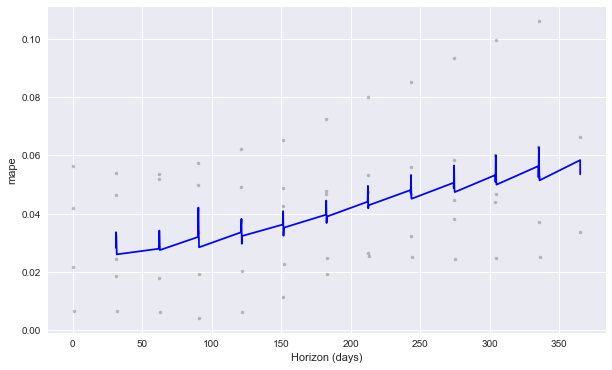

In [76]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_80482, metric='mape')

#### For Zip 20144

In [77]:
zip_20144 = for_model.loc[:,['ds','20144']]

In [78]:
zip_20144.rename(columns={'20144':'y'}, inplace=True)

In [79]:
model_20144=Prophet(interval_width=0.95)
model_20144.fit(zip_20144);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [80]:
forecast_20144=model_20144.predict(future)
forecast_20144.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
284 2020-08-31  704654.144285  678541.344064  733242.858470  687421.865757   
285 2020-09-30  706963.404386  675155.110419  736330.132315  686581.617584   
286 2020-10-31  709349.639824  678844.297672  741451.645231  684832.845951   
287 2020-11-30  711658.899926  680029.125130  747520.709979  684959.295533   
288 2020-12-31  714045.135364  677140.411974  750873.651396  683355.829316   

       trend_upper  additive_terms  additive_terms_lower  \
284  721905.075885      428.739510            428.739510   
285  726988.915449     -659.088102           -659.088102   
286  732186.303946      522.308575            522.308575   
287  737307.866566      881.698888            881.698888   
288  742990.296777      623.480823            623.480823   

     additive_terms_upper      yearly  yearly_lower  yearly_upper  \
284            428.739510  428.739510    428.739510    428.739510   
285           -659.088102 -659.088102   -659.088102   -659.088102   
286            522.308575  522.308575    522.308575    522.308575   
287            881.698888  881.698888    881.698888    881.698888   
288            623.480823  623.480823    623.480823    623.480823   

     multiplicative_terms  multiplicative_terms_lower  \
284                   0.0                         0.0   
285                   0.0                         0.0   
286                   0.0                         0.0   
287                   0.0                         0.0   
288                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
284                         0.0  705082.883795  
285                         0.0  706304.316284  
286                         0.0  709871.948399  
287                         0.0  712540.598814  
288                         0.0  714668.616186

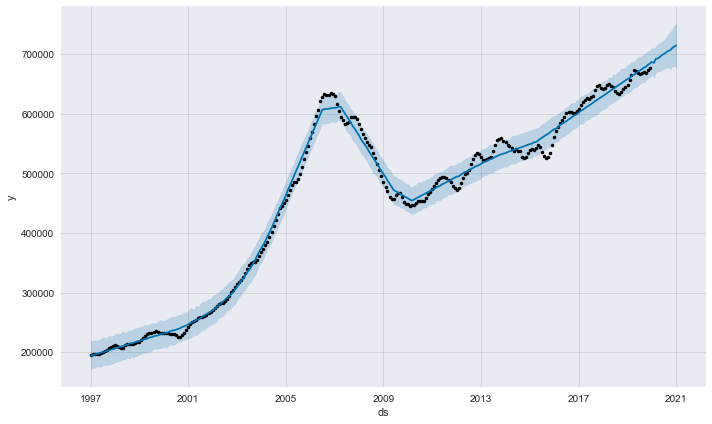

In [81]:
model_20144.plot(forecast_20144);

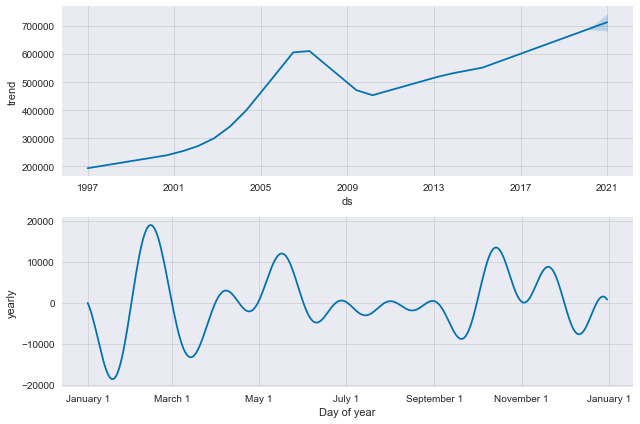

In [82]:
model_20144.plot_components(forecast_20144);

In [83]:
from fbprophet.diagnostics import cross_validation
cv_20144= cross_validation(model_20144, initial = pd.to_timedelta(204,unit="M"), horizon = pd.to_timedelta(12,unit="M"),
                        period = pd.to_timedelta(12,unit="M"))

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-11-30 18:54:00 and 2018-11-30 18:10:48
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\

In [84]:
cv_20144.head()

ds           yhat     yhat_lower     yhat_upper         y  \
0 2014-12-01  561626.948008  541111.699190  581974.246929  534826.0   
1 2015-01-01  562458.261462  542855.663943  581658.836611  538492.0   
2 2015-02-01  562764.510534  543299.317272  582278.315141  540532.0   
3 2015-03-01  564931.934448  544499.526153  586045.912348  539476.0   
4 2015-04-01  564896.899305  543456.973046  584322.810290  543155.0   

               cutoff  
0 2014-11-30 18:54:00  
1 2014-11-30 18:54:00  
2 2014-11-30 18:54:00  
3 2014-11-30 18:54:00  
4 2014-11-30 18:54:00

In [85]:
from fbprophet.diagnostics import performance_metrics
performance_20144 = performance_metrics(cv_20144)
performance_20144.head()

horizon           mse          rmse           mae      mape  \
0 31 days 05:06:00  3.944337e+08  19860.355141  17723.098626  0.030646   
1 31 days 05:49:12  2.828553e+08  16818.302376  14420.799909  0.024092   
2 31 days 11:38:24  3.337920e+08  18269.974526  16276.021020  0.026997   
3 31 days 17:27:36  3.551176e+08  18844.563360  16724.529851  0.028062   
4 61 days 23:16:48  3.081758e+08  17554.937639  15454.866129  0.026198   

   coverage  
0  0.666667  
1  0.833333  
2  0.833333  
3  0.666667  
4  0.666667

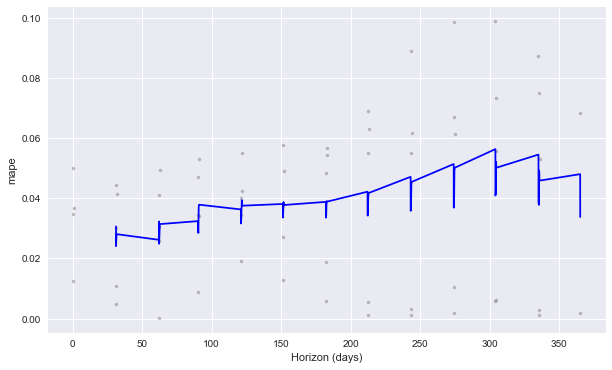

In [86]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_20144, metric='mape')

## Doing it by a function

In [87]:
zips = ['98651', '80482', '20144', '55074', '55069', '97041', '55032','83442', '97031', '80447']

In [88]:
models = {}
forecasts = {}
for z in zips:
    temp = for_model.loc[:,['ds',z]]
    temp.rename(columns={z:'y'}, inplace=True)
    model = Prophet(interval_width=0.95)
    model.fit(temp)
    models[z] = model
    future = model.make_future_dataframe(periods=13,freq="M",include_history=True)
    forecast = model.predict(future)
    forecasts[z] = forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO

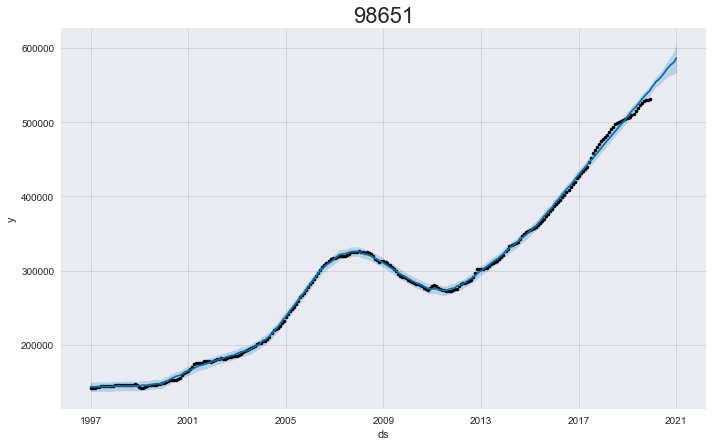

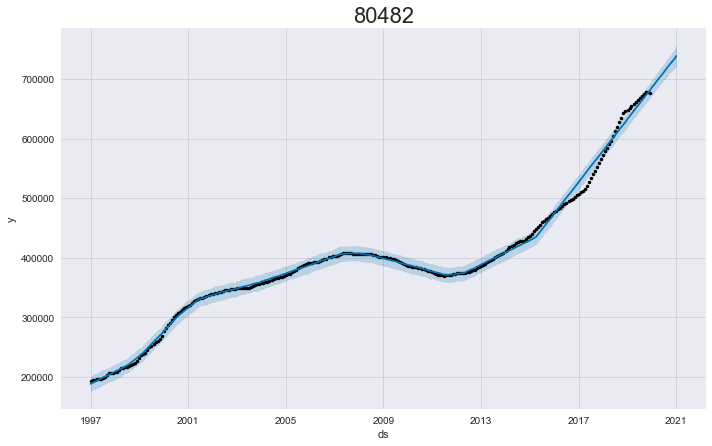

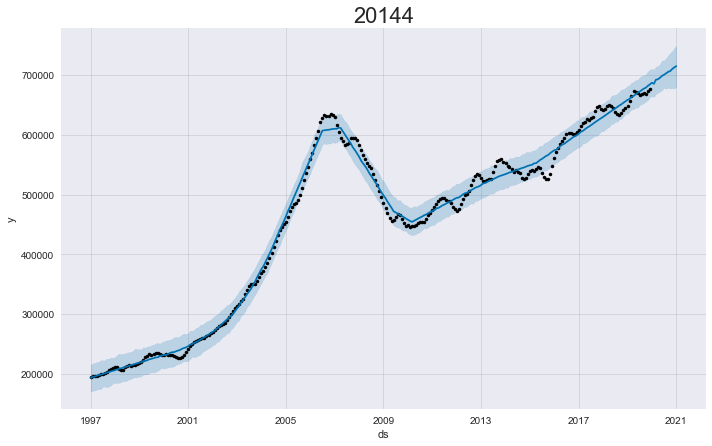

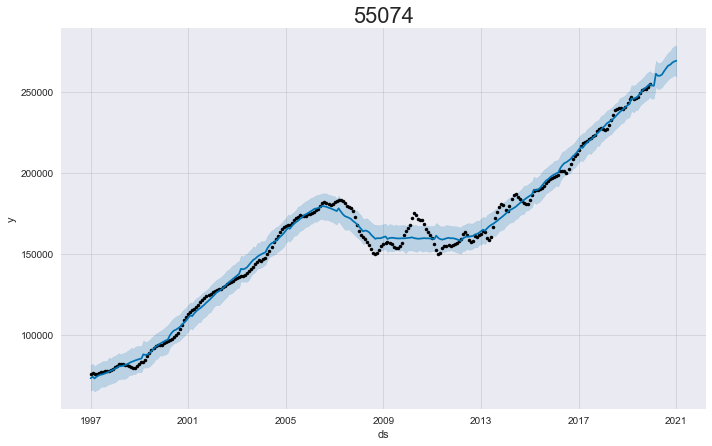

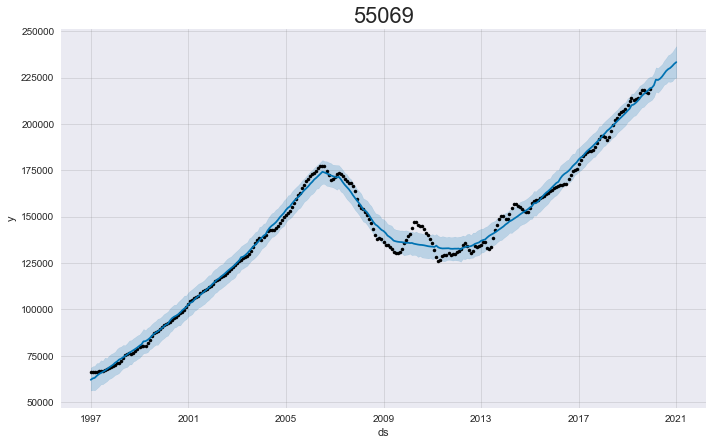

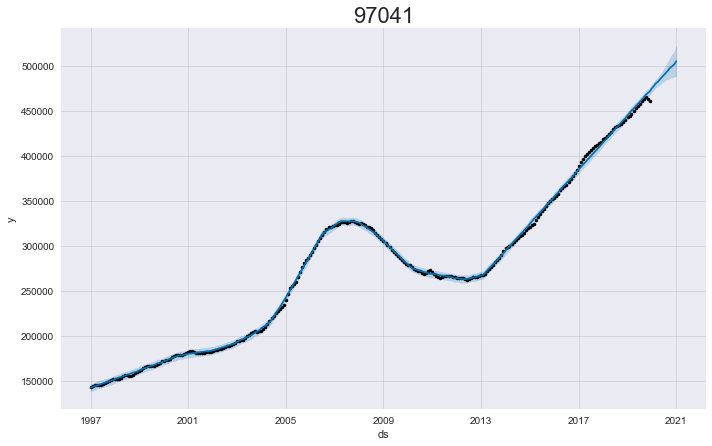

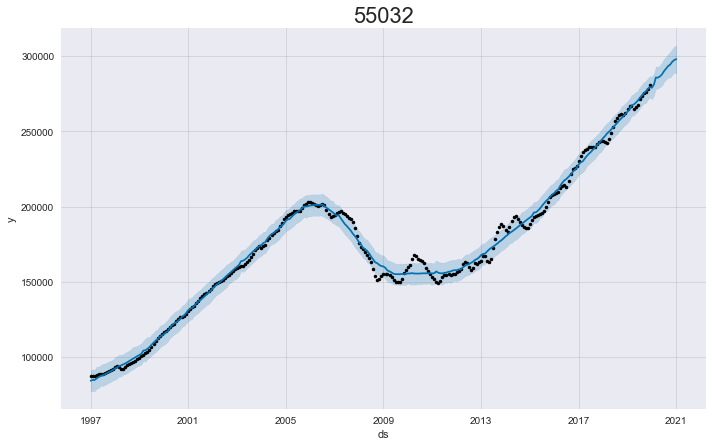

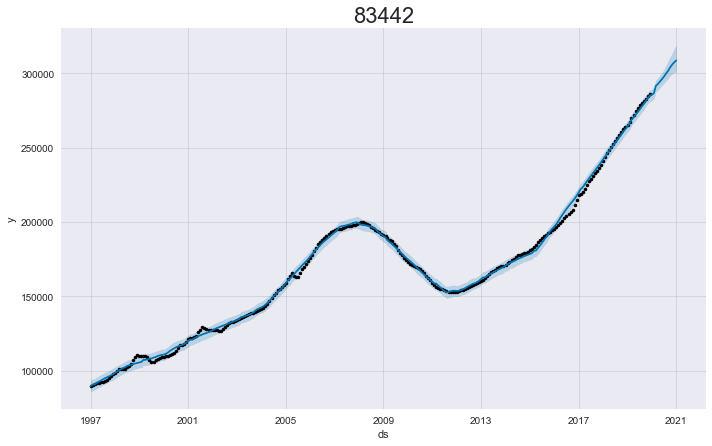

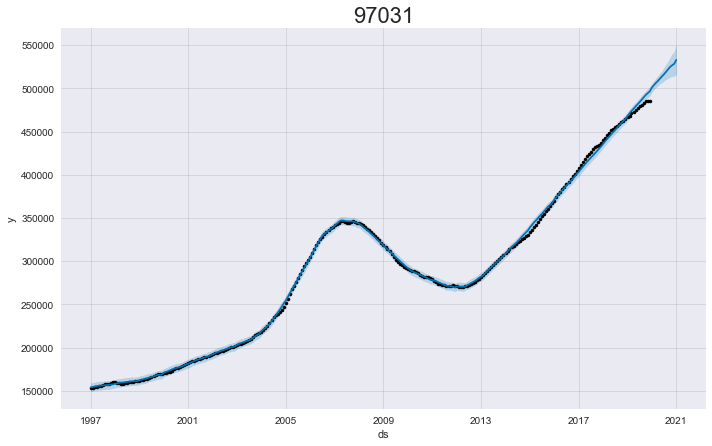

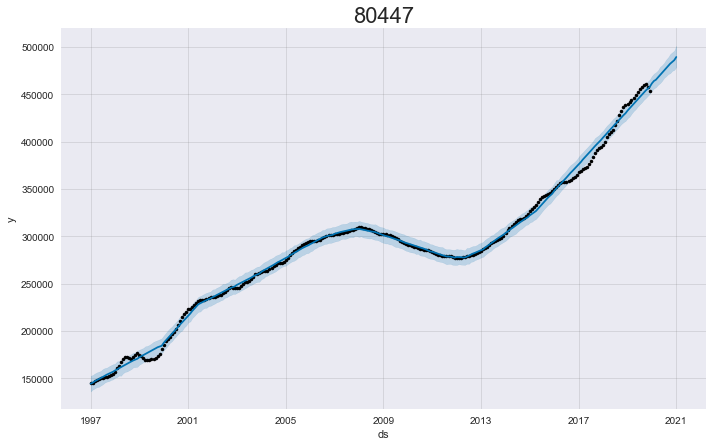

In [89]:
for z in zips:
    fig = models[z].plot(forecasts[z])
    ax = fig.gca()
    ax.set_title(z, size=22)

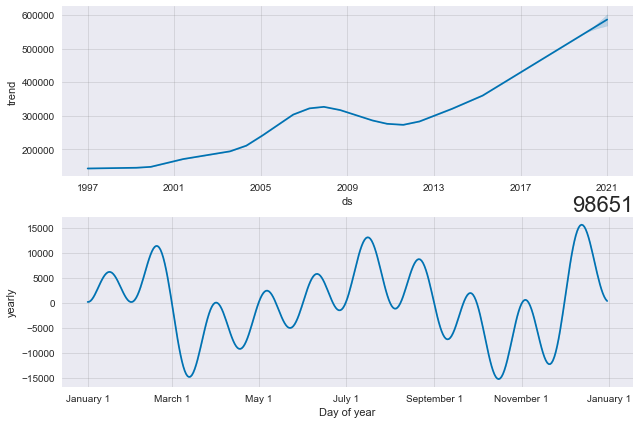

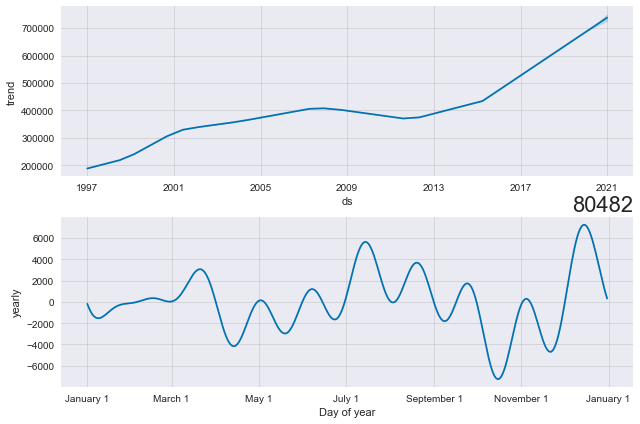

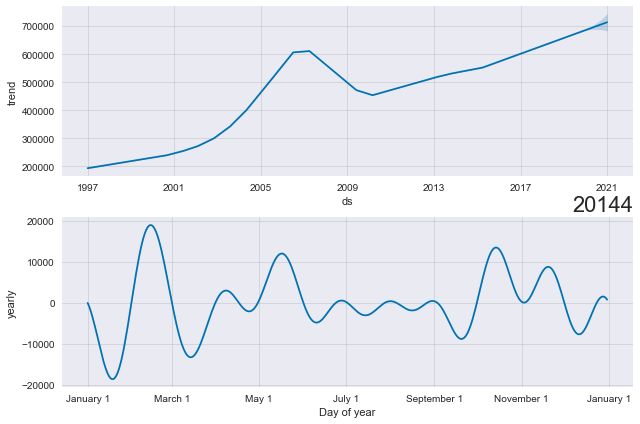

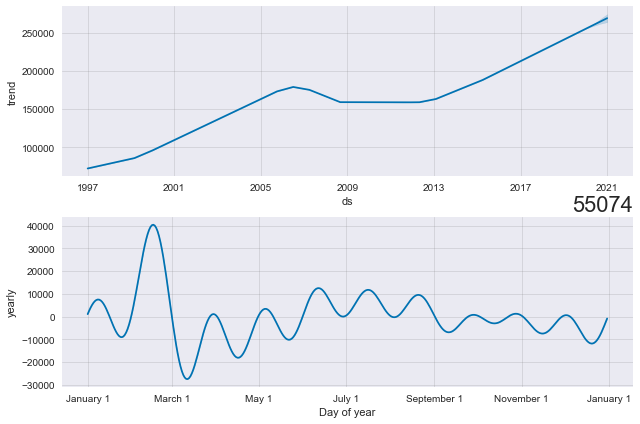

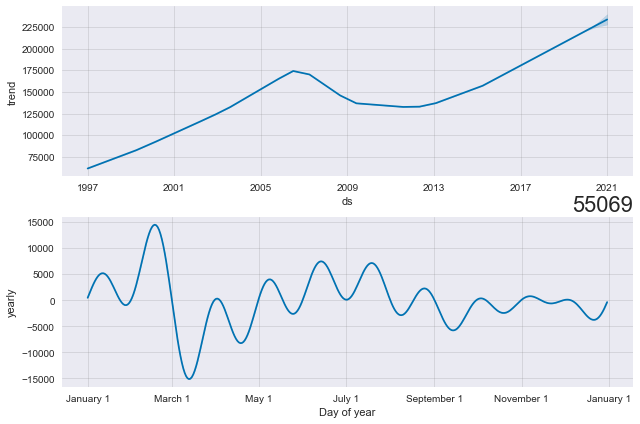

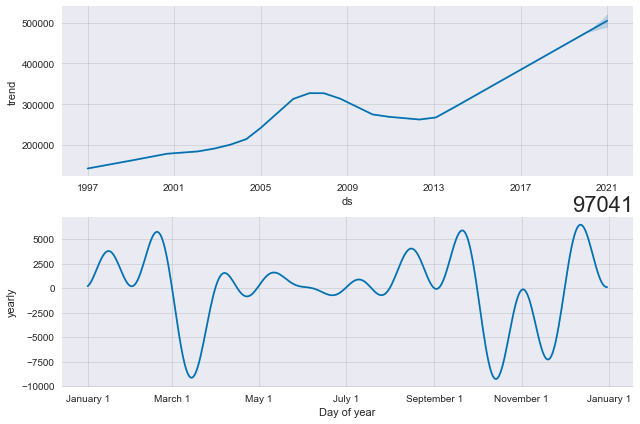

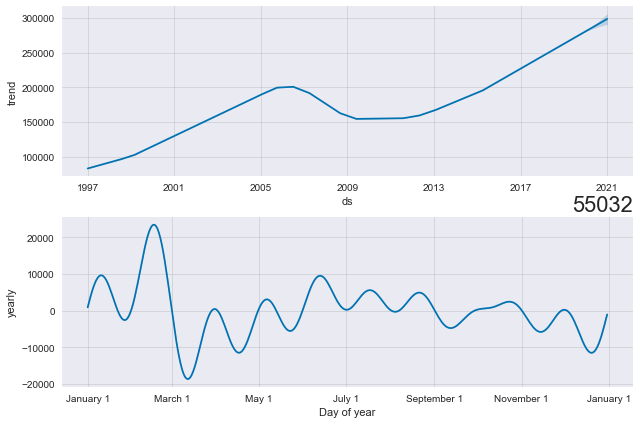

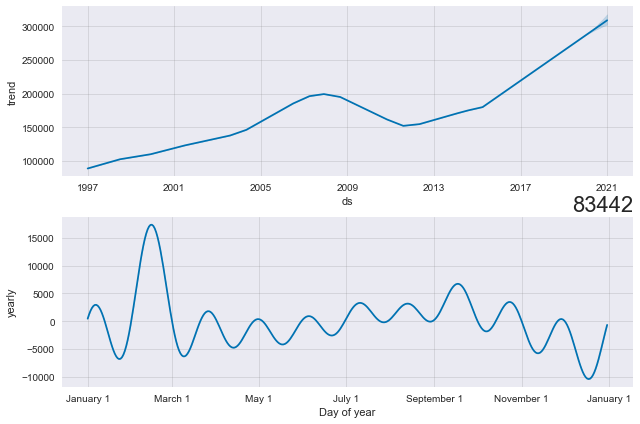

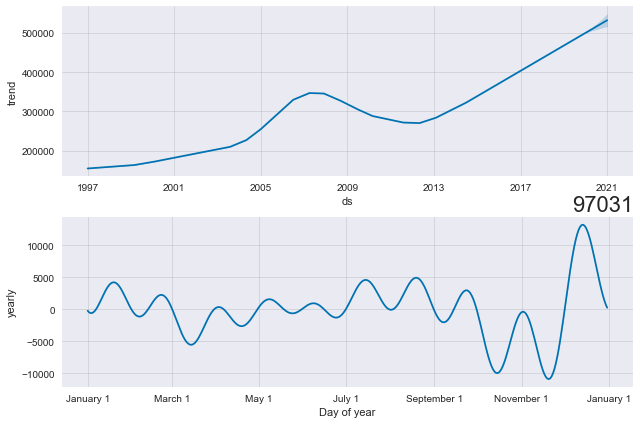

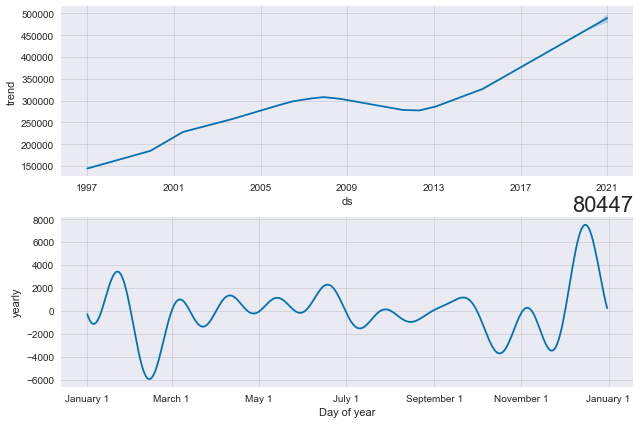

In [90]:
for z in zips:
    fig = models[z].plot_components(forecasts[z])
    ax = fig.gca()
    ax.set_title(z, size=22,loc='right')

In [91]:
cross_validations = {}
performances = {}
for z in zips:
    cv = cross_validation(models[z], initial = pd.to_timedelta(204,unit="M"), horizon = pd.to_timedelta(12,unit="M"),
                        period = pd.to_timedelta(12,unit="M"))
    cross_validations[z] = cv
    p = performance_metrics(cv)
    performances[z] = p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-11-30 18:54:00 and 2018-11-30 18:10:48
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\allan\Anaconda3\

In [92]:
###Example on how to check cross validation of a zip code
cross_validations['98651']

ds           yhat     yhat_lower     yhat_upper         y  \
0  2014-12-01  344513.655980  339142.038067  350259.502414  352909.0   
1  2015-01-01  346454.548314  340516.507367  352506.430901  354484.0   
2  2015-02-01  348478.274349  342837.386367  354320.966555  355501.0   
3  2015-03-01  351441.882837  345197.380383  357845.061695  357506.0   
4  2015-04-01  352949.083476  346809.044654  359624.879635  359353.0   
5  2015-05-01  353992.226451  347021.545293  361157.167475  362082.0   
6  2015-06-01  355281.066356  347803.131444  362990.837008  364297.0   
7  2015-07-01  356687.590048  348984.891113  365079.530625  366819.0   
8  2015-08-01  358839.910335  349855.191392  368937.752991  369805.0   
9  2015-09-01  360977.704206  350745.964110  370922.095690  373055.0   
10 2015-10-01  362991.734531  351077.233283  374192.444079  376270.0   
11 2015-11-01  364806.683134  352255.845893  377583.235142  379743.0   
12 2015-12-01  365872.814800  351426.395582  379076.353478  383125.0   
13 2016-01-01  381142.083660  377793.159791  384384.912900  386756.0   
14 2016-02-01  384169.580796  380734.431222  387420.565782  389789.0   
15 2016-03-01  386061.305401  382522.500652  389439.865023  392600.0   
16 2016-04-01  388204.420672  383973.390296  391893.170858  395358.0   
17 2016-05-01  390032.589521  385056.721061  394500.386258  398705.0   
18 2016-06-01  392031.371510  386460.454424  397300.669446  402356.0   
19 2016-07-01  394140.237992  386620.744614  400409.402699  405764.0   
20 2016-08-01  396085.249353  387329.207843  404095.134774  409081.0   
21 2016-09-01  398251.508946  388939.932673  407459.349674  412596.0   
22 2016-10-01  400834.834811  389706.669537  412109.440678  416124.0   
23 2016-11-01  403643.446035  390192.087826  415892.709936  420031.0   
24 2016-12-01  413815.522949  409596.545216  418391.181240  424196.0   
25 2017-01-01  416380.815858  412095.669548  420882.477134  427890.0   
26 2017-02-01  418734.270097  413936.987945  423549.957090  431289.0   
27 2017-03-01  421645.253725  416813.647597  426545.418501  433808.0   
28 2017-04-01  424027.287349  418087.548686  429451.347501  436826.0   
29 2017-05-01  426318.698305  420368.776283  432281.501518  440246.0   
30 2017-06-01  428623.567527  420239.497189  436414.302370  446149.0   
31 2017-07-01  431041.001930  421366.101056  440165.753610  452317.0   
32 2017-08-01  433464.225392  422192.809103  443667.827048  458881.0   
33 2017-09-01  435990.794616  422369.784751  448325.347340  463112.0   
34 2017-10-01  438699.820126  424497.464525  452461.948644  467300.0   
35 2017-11-01  441652.560017  425930.006835  456280.196386  471298.0   
36 2017-12-01  459149.069306  453302.966730  465426.185421  474820.0   
37 2018-01-01  462359.126776  456227.417331  468610.155443  477477.0   
38 2018-02-01  465449.479194  459184.403861  472191.890950  479505.0   
39 2018-03-01  468363.594961  461566.059707  475254.335284  482705.0   
40 2018-04-01  471013.134745  464026.378522  478012.132193  486251.0   
41 2018-05-01  473742.612627  466022.772497  480745.956576  490564.0   
42 2018-06-01  476649.384316  468452.710090  484189.001602  494045.0   
43 2018-07-01  479545.589903  469890.354524  488885.643394  498236.0   
44 2018-08-01  482731.259839  472409.082892  491507.655331  499428.0   
45 2018-09-01  485898.666366  474091.418377  497032.260595  500669.0   
46 2018-10-01  488822.099711  474627.108542  501436.476953  501167.0   
47 2018-11-01  491753.340081  476533.228752  504752.901984  502845.0   
48 2018-12-01  507481.500003  501510.516874  514082.976495  503895.0   
49 2019-01-01  510737.778637  505042.301487  517025.529949  505494.0   
50 2019-02-01  513865.436825  507759.865344  519829.127507  506869.0   
51 2019-03-01  518304.051794  511276.835430  524818.600457  509206.0   
52 2019-04-01  520888.758067  514223.504941  527751.474860  511735.0   
53 2019-05-01  523620.586843  516205.828144  531266.297175  515673.0   
54 2019-06-01  526591.740075  518827.386470  534569

In [93]:
###Example on how to check performance of a zip code
performances['98651']

horizon           mse          rmse           mae      mape  \
0   31 days 05:06:00  8.877755e+07   9422.183993   8612.769966  0.020925   
1   31 days 05:49:12  8.161345e+07   9034.016460   8087.509069  0.018689   
2   31 days 11:38:24  1.175613e+08  10842.569106  10009.404605  0.022779   
3   31 days 17:27:36  9.870851e+07   9935.215815   9315.780180  0.021762   
4   61 days 23:16:48  8.601244e+07   9274.289264   8522.270539  0.020086   
5   62 days 05:06:00  8.897954e+07   9432.896930   8757.072091  0.020959   
6   62 days 05:49:12  8.639255e+07   9294.759283   8584.902947  0.019485   
7   62 days 11:38:24  1.147360e+08  10711.487226  10053.526642  0.022641   
8   62 days 17:27:36  1.029145e+08  10144.677617   9626.336089  0.022216   
9   90 days 05:06:00  8.696652e+07   9325.583995   8718.824925  0.020560   
10  90 days 05:49:12  9.549930e+07   9772.374117   9298.597024  0.021135   
11  90 days 11:38:24  1.215588e+08  11025.372240  10518.376922  0.022794   
12  90 days 17:27:36  1.380559e+08  11749.718202  11379.428497  0.025167   
13  90 days 23:16:48  1.122554e+08  10595.062756  10126.624129  0.023057   
14 121 days 05:06:00  9.282017e+07   9634.322609   9101.488566  0.021175   
15 121 days 05:49:12  1.006565e+08  10032.769662   9616.428716  0.021330   
16 121 days 11:38:24  1.255595e+08  11205.332017  10639.730960  0.023575   
17 121 days 17:27:36  1.185813e+08  10889.505197  10382.615562  0.023506   
18 121 days 23:16:48  1.024549e+08  10121.999481   9547.754404  0.021849   
19 151 days 05:06:00  1.062365e+08  10307.110409   9806.267562  0.022797   
20 151 days 05:49:12  1.099289e+08  10484.696305  10063.545949  0.022395   
21 151 days 11:38:24  1.431235e+08  11963.422908  11341.484167  0.025129   
22 151 days 17:27:36  1.367530e+08  11694.144697  11123.056907  0.025179   
23 151 days 23:16:48  1.219870e+08  11044.770852  10435.339878  0.023921   
24 182 days 05:06:00  1.270059e+08  11269.687524  10745.732264  0.025030   
25 182 days 05:49:12  1.241900e+08  11144.057512  10558.726685  0.023541   
26 182 days 11:38:24  1.640972e+08  12810.044337  12133.398158  0.026841   
27 182 days 17:27:36  1.681275e+08  12966.399691  12250.739008  0.027673   
28 182 days 23:16:48  1.535656e+08  12392.157107  11650.293474  0.026677   
29 212 days 05:06:00  1.581380e+08  12575.293971  11893.460053  0.027655   
30 212 days 05:49:12  1.514259e+08  12305.524857  11458.181825  0.025570   
31 212 days 11:38:24  2.015563e+08  14197.051806  13411.960162  0.029587   
32 212 days 17:27:36  2.265664e+08  15052.122380  14058.690559  0.031558   
33 212 days 23:16:48  1.978949e+08  14067.512151  13075.078815  0.029786   
34 243 days 05:06:00  2.001674e+08  14148.054204  13181.822344  0.030451   
35 243 days 05:49:12  1.914273e+08  13835.725806  12674.175182  0.028091   
36 243 days 11:38:24  2.310551e+08  15200.495511  14389.587830  0.031623   
37 243 days 17:27:36  2.805019e+08  16748.190870  15510.648582  0.034603   
38 243 days 23:16:48  2.332055e+08  15271.066463  14130.607344  0.032058   
39 274 days 05:06:00  2.349970e+08  15329.612171  14206.196309  0.032679   
40 274 days 05:49:12  2.282879e+08  15109.198737  13869.192596  0.030558   
41 274 days 11:38:24  2.562809e+08  16008.775625  15149.993705  0.033232   
42 274 days 17:27:36  3.324107e+08  18232.132950  16887.404576  0.037421   
43 274 days 23:16:48  2.590360e+08  16094.595488  15042.023984  0.033984   
44 304 days 05:06:00  2.602731e+08  16132.982895  15089.109787  0.034570   
45 304 days 05:49:12  2.522678e+08  15882.939450  14724.701572  0.032282   
46 304 days 11:38:24  2.643375e+08  16258.457811  15291.673722  0.033566   
47 304 days 17:27:36  3.643054e+08  19086.785287  17596.648095  0.038850   
48 304 days 23:16:48  2.806718e+08  16753.263494  15624.641396  0.035213   
49 335 days 05:06:00  2.835600e+08  16839.240700  15723.279032  0.035974   
50 335 days 05:49:12  2.821526e+08  16797.399271  15669.632229  0.034163   
51 335 days 11:38:24  2.863520e+08  16921.937481  15869.76779

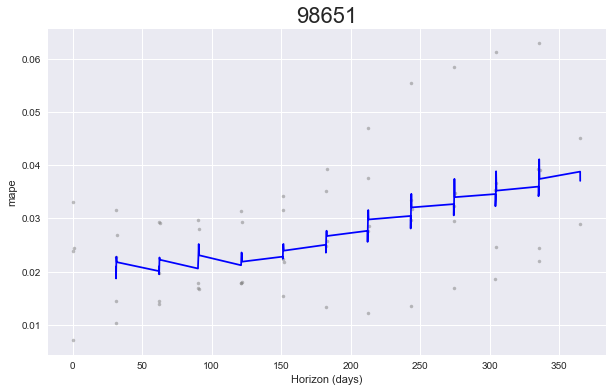

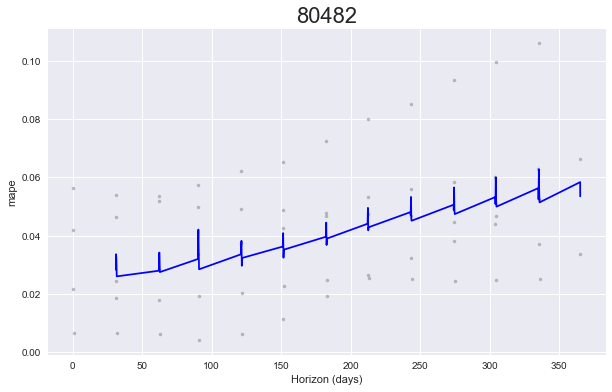

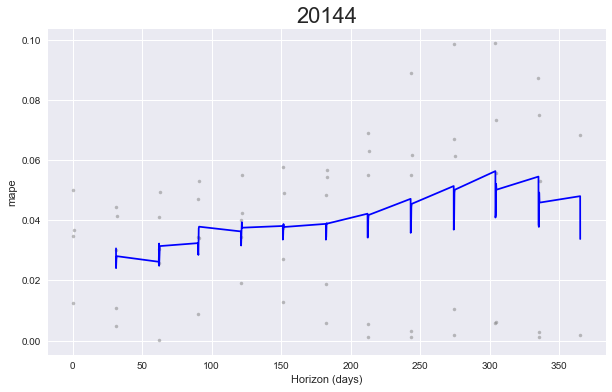

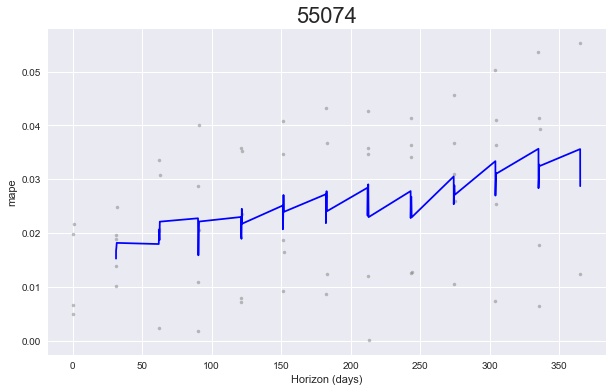

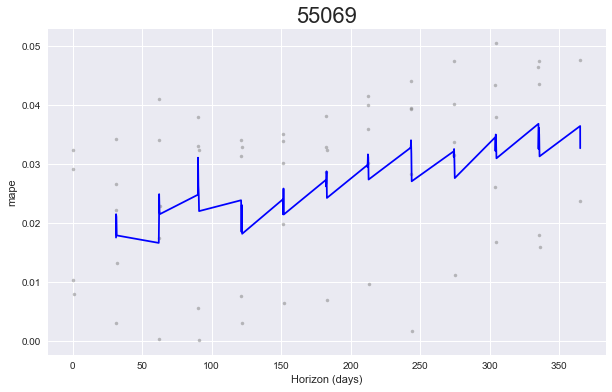

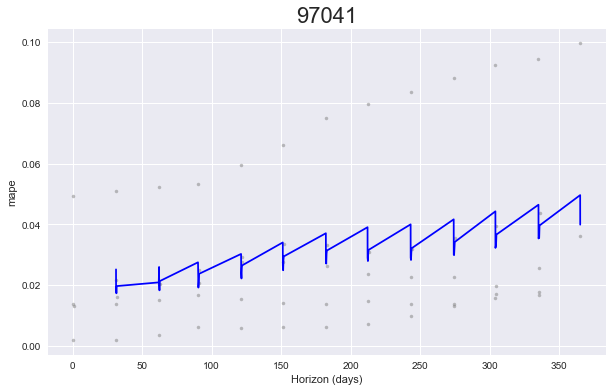

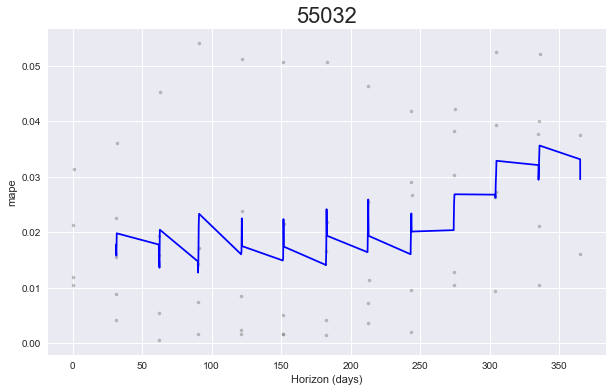

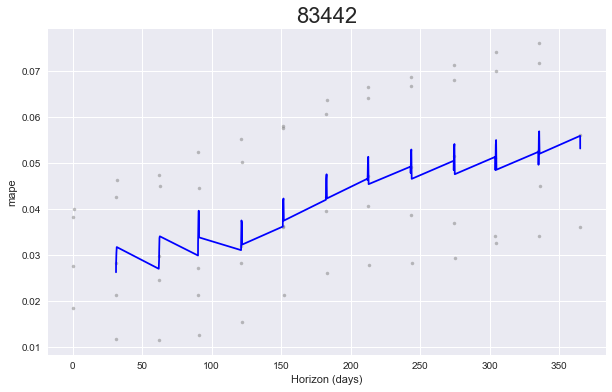

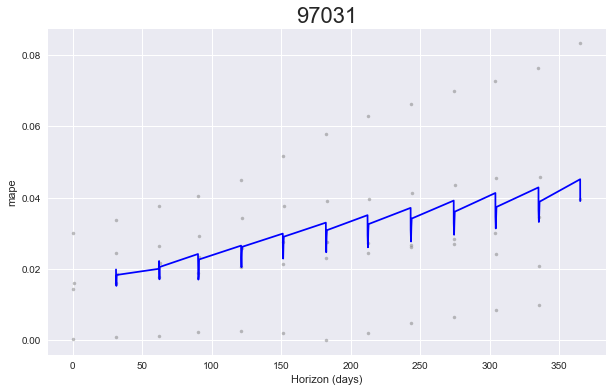

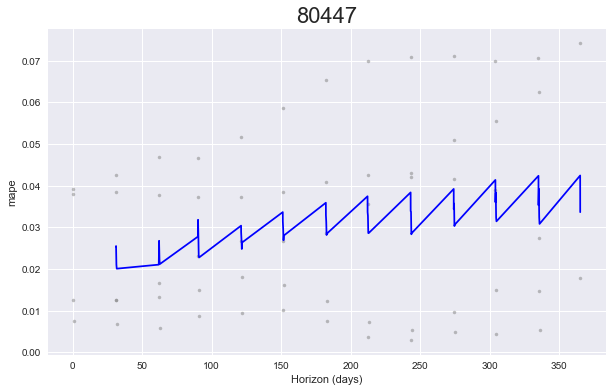

In [94]:
for z in zips:
    fig = plot_cross_validation_metric(cross_validations[z], metric='mape')
    ax = fig.gca()
    ax.set_title(z, size=22)

### Appending it to best 10 data set

In [95]:
l = []
for z in zips:
    l.append(forecasts[z].iloc[265:,-1])

In [96]:
forecast_df = pd.concat(l, axis=1)

In [97]:
forecast_df['ds'] = forecasts['98651'].iloc[265:,0]

In [98]:
forecast_df = forecast_df.set_index('ds').T

In [99]:
best10

RegionID  RegionName                 City State  \
28245     99945       98651            Underwood    WA   
27363     93426       80482          Winter Park    CO   
20006     66240       20144            Delaplane    VA   
21239     82086       55074               Shafer    MN   
21237     82081       55069            Rush City    MN   
17861     99045       97041  Mount Hood Parkdale    OR   
21238     82054       55032               Harris    MN   
19144     94167       83442                Rigby    ID   
17860     99035       97031           Hood River    OR   
27362     93397       80447           Grand Lake    CO   

                                  Metro         CountyName  SizeRank  \
28245      Portland-Vancouver-Hillsboro    Skamania County     22693   
27363                               NaN       Grand County     15679   
20006   Washington-Arlington-Alexandria    Fauquier County     21925   
21239  Minneapolis-St. Paul-Bloomington     Chisago County     18169   
21237  Minneapolis-St. Paul-Bloomington     Chisago County     13351   
17861                        Hood River  Hood River County     16248   
21238  Minneapolis-St. Paul-Bloomington     Chisago County     15468   
19144                       Idaho Falls   Jefferson County      7026   
17860                        Hood River  Hood River County      6089   
27362                               NaN       Grand County     15011   

        1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07  \
28245  141910.0  142060.0  142424.0  142861.0  143423.0  144306.0  144663.0   
27363  193674.0  194821.0  195546.0  196047.0  196527.0  197410.0  198365.0   
20006  195129.0  196220.0  196343.0  196905.0  197745.0  199136.0  199748.0   
21239   76048.0   76177.0   76084.0   76137.0   76483.0   76929.0   77322.0   
21237   66032.0   66323.0   66384.0   66490.0   66515.0   66624.0   66839.0   
17861  142773.0  143591.0  144916.0  145167.0  145763.0  145797.0  146674.0   
21238   87320.0   87134.0   87512.0   87847.0   88523.0   88717.0   88839.0   
19144   89941.0   90694.0   91167.0   91532.0   91879.0   92310.0   92666.0   
17860  153000.0  153755.0  154520.0  154816.0  155274.0  155803.0  156783.0   
27362  144944.0  145490.0  146627.0  148190.0  149147.0  149814.0  150054.0   

        1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02  \
28245  144471.0  144331.0  143932.0  144024.0  144452.0  145494.0  146223.0   
27363  200846.0  203521.0  206153.0  207093.0  207553.0  208255.0  209088.0   
20006  201797.0  203983.0  206873.0  208441.0  210580.0  211842.0  211145.0   
21239   77473.0   77538.0   77984.0   78476.0   79202.0   79946.0   80919.0   
21237   67199.0   67838.0   68396.0   68881.0   69422.0   70053.0   70854.0   
17861  147508.0  148923.0  150109.0  151218.0  151928.0  152328.0  152360.0   
21238   89136.0   89711.0   90409.0   91014.0   91904.0   93360.0   93867.0   
19144   92949.0   93586.0   95095.0   96499.0   97780.0   98458.0   99699.0   
17860  157457.0  158033.0  158425.0  159326.0  160349.0  160136.0  159586.0   
27362  150824.0  151443.0  152310.0  153242.0  154611.0  156747.0  160507.0   

        1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09  \
28245  146119.0  145606.0  145486.0  145666.0  146116.0  146096.0  146131.0   
27363  211525.0  214385.0  215891.0  216049.0  216208.0  218423.0  220390.0   
20006  208191.0  206489.0  207360.0  211313.0  213776.0  214402.0  213547.0   
21239   82136.0   82070.0   82016.0   81257.0   81686.0   80952.0   80396.0   
21237   71276.0   72344.0   73622.0   75533.0   76064.0   76272.0   76124.0   
17861  152103.0  152951.0  154939.0  156351.0  156194.0  154893.0  155648.0   
21238   93037.0   92214.0   92221.0   93348.0   94513.0   95513.0   96243.0   
19144  101304.0  101275.0  101404.0  101478.0  102541.0  103296.0  104336.0   
17860  158794.0  158387.0  158409.0  158696.0  159595.0  160041.0  160172.0   
27362  163447.0  167136.0  170206.0  171977.0

In [100]:
with_forecast = pd.concat([best10.reset_index(drop=True), forecast_df.reset_index(drop=True)], axis=1)

In [101]:
with_forecast

RegionID  RegionName                 City State  \
0     99945       98651            Underwood    WA   
1     93426       80482          Winter Park    CO   
2     66240       20144            Delaplane    VA   
3     82086       55074               Shafer    MN   
4     82081       55069            Rush City    MN   
5     99045       97041  Mount Hood Parkdale    OR   
6     82054       55032               Harris    MN   
7     94167       83442                Rigby    ID   
8     99035       97031           Hood River    OR   
9     93397       80447           Grand Lake    CO   

                              Metro         CountyName  SizeRank   1997-01  \
0      Portland-Vancouver-Hillsboro    Skamania County     22693  141910.0   
1                               NaN       Grand County     15679  193674.0   
2   Washington-Arlington-Alexandria    Fauquier County     21925  195129.0   
3  Minneapolis-St. Paul-Bloomington     Chisago County     18169   76048.0   
4  Minneapolis-St. Paul-Bloomington     Chisago County     13351   66032.0   
5                        Hood River  Hood River County     16248  142773.0   
6  Minneapolis-St. Paul-Bloomington     Chisago County     15468   87320.0   
7                       Idaho Falls   Jefferson County      7026   89941.0   
8                        Hood River  Hood River County      6089  153000.0   
9                               NaN       Grand County     15011  144944.0   

    1997-02   1997-03   1997-04   1997-05   1997-06   1997-07   1997-08  \
0  142060.0  142424.0  142861.0  143423.0  144306.0  144663.0  144471.0   
1  194821.0  195546.0  196047.0  196527.0  197410.0  198365.0  200846.0   
2  196220.0  196343.0  196905.0  197745.0  199136.0  199748.0  201797.0   
3   76177.0   76084.0   76137.0   76483.0   76929.0   77322.0   77473.0   
4   66323.0   66384.0   66490.0   66515.0   66624.0   66839.0   67199.0   
5  143591.0  144916.0  145167.0  145763.0  145797.0  146674.0  147508.0   
6   87134.0   87512.0   87847.0   88523.0   88717.0   88839.0   89136.0   
7   90694.0   91167.0   91532.0   91879.0   92310.0   92666.0   92949.0   
8  153755.0  154520.0  154816.0  155274.0  155803.0  156783.0  157457.0   
9  145490.0  146627.0  148190.0  149147.0  149814.0  150054.0  150824.0   

    1997-09   1997-10   1997-11   1997-12   1998-01   1998-02   1998-03  \
0  144331.0  143932.0  144024.0  144452.0  145494.0  146223.0  146119.0   
1  203521.0  206153.0  207093.0  207553.0  208255.0  209088.0  211525.0   
2  203983.0  206873.0  208441.0  210580.0  211842.0  211145.0  208191.0   
3   77538.0   77984.0   78476.0   79202.0   79946.0   80919.0   82136.0   
4   67838.0   68396.0   68881.0   69422.0   70053.0   70854.0   71276.0   
5  148923.0  150109.0  151218.0  151928.0  152328.0  152360.0  152103.0   
6   89711.0   90409.0   91014.0   91904.0   93360.0   93867.0   93037.0   
7   93586.0   95095.0   96499.0   97780.0   98458.0   99699.0  101304.0   
8  158033.0  158425.0  159326.0  160349.0  160136.0  159586.0  158794.0   
9  151443.0  152310.0  153242.0  154611.0  156747.0  160507.0  163447.0   

    1998-04   1998-05   1998-06   1998-07   1998-08   1998-09   1998-10  \
0  145606.0  145486.0  145666.0  146116.0  146096.0  146131.0  146172.0   
1  214385.0  215891.0  216049.0  216208.0  218423.0  220390.0  221897.0   
2  206489.0  207360.0  211313.0  213776.0  214402.0  213547.0  214193.0   
3   82070.0   82016.0   81257.0   81686.0   80952.0   80396.0   79478.0   
4   72344.0   73622.0   75533.0   76064.0   76272.0   76124.0   76711.0   
5  152951.0  154939.0  156351.0  156194.0  154893.0  155648.0  156361.0   
6   92214.0   92221.0   93348.0   94513.0   95513.0   96243.0   96716.0   
7  101275.0  101404.0  101478.0  102541.0  103296.0  104336.0  106937.0   
8  158387.0  158409.0  158696.0  159595.0  160041.0  160172.0  160458.0   
9  167136.0  170206.0  171977.0  172639.0  171095.0  170819.0  172073.0   

    1998-11   1998-12   1999-01   1999-02   1999-03   1999-04   1999-05

In [102]:
with_forecast = with_forecast.drop(["RegionID","City","CountyName","SizeRank","State","Metro","Growth","Crime_Rate",
                                   "MedInc","std","mean"],axis=1)

In [103]:
with_forecast.set_index('RegionName', inplace=True)

In [104]:
with_forecast

1997-01   1997-02   1997-03   1997-04   1997-05   1997-06  \
RegionName                                                               
98651       141910.0  142060.0  142424.0  142861.0  143423.0  144306.0   
80482       193674.0  194821.0  195546.0  196047.0  196527.0  197410.0   
20144       195129.0  196220.0  196343.0  196905.0  197745.0  199136.0   
55074        76048.0   76177.0   76084.0   76137.0   76483.0   76929.0   
55069        66032.0   66323.0   66384.0   66490.0   66515.0   66624.0   
97041       142773.0  143591.0  144916.0  145167.0  145763.0  145797.0   
55032        87320.0   87134.0   87512.0   87847.0   88523.0   88717.0   
83442        89941.0   90694.0   91167.0   91532.0   91879.0   92310.0   
97031       153000.0  153755.0  154520.0  154816.0  155274.0  155803.0   
80447       144944.0  145490.0  146627.0  148190.0  149147.0  149814.0   

             1997-07   1997-08   1997-09   1997-10   1997-11   1997-12  \
RegionName                                                               
98651       144663.0  144471.0  144331.0  143932.0  144024.0  144452.0   
80482       198365.0  200846.0  203521.0  206153.0  207093.0  207553.0   
20144       199748.0  201797.0  203983.0  206873.0  208441.0  210580.0   
55074        77322.0   77473.0   77538.0   77984.0   78476.0   79202.0   
55069        66839.0   67199.0   67838.0   68396.0   68881.0   69422.0   
97041       146674.0  147508.0  148923.0  150109.0  151218.0  151928.0   
55032        88839.0   89136.0   89711.0   90409.0   91014.0   91904.0   
83442        92666.0   92949.0   93586.0   95095.0   96499.0   97780.0   
97031       156783.0  157457.0  158033.0  158425.0  159326.0  160349.0   
80447       150054.0  150824.0  151443.0  152310.0  153242.0  154611.0   

             1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
RegionName                                                               
98651       145494.0  146223.0  146119.0  145606.0  145486.0  145666.0   
80482       208255.0  209088.0  211525.0  214385.0  215891.0  216049.0   
20144       211842.0  211145.0  208191.0  206489.0  207360.0  211313.0   
55074        79946.0   80919.0   82136.0   82070.0   82016.0   81257.0   
55069        70053.0   70854.0   71276.0   72344.0   73622.0   75533.0   
97041       152328.0  152360.0  152103.0  152951.0  154939.0  156351.0   
55032        93360.0   93867.0   93037.0   92214.0   92221.0   93348.0   
83442        98458.0   99699.0  101304.0  101275.0  101404.0  101478.0   
97031       160136.0  159586.0  158794.0  158387.0  158409.0  158696.0   
80447       156747.0  160507.0  163447.0  167136.0  170206.0  171977.0   

             1998-07   1998-08   1998-09   1998-10   1998-11   1998-12  \
RegionName                                                               
98651       146116.0  146096.0  146131.0  146172.0  146661.0  145471.0   
80482       216208.0  218423.0  220390.0  221897.0  223252.0  227013.0   
20144       213776.0  214402.0  213547.0  214193.0  214764.0  216340.0   
55074        81686.0   80952.0   80396.0   79478.0   79558.0   81039.0   
55069        76064.0   76272.0   76124.0   76711.0   77462.0   78500.0   
97041       156194.0  154893.0  155648.0  156361.0  158553.0  159590.0   
55032        94513.0   95513.0   96243.0   96716.0   97471.0   98680.0   
83442       102541.0  103296.0  104336.0  106937.0  109304.0  110350.0   
97031       159595.0  160041.0  160172.0  160458.0  160861.0  161343.0   
80447       172639.0  171095.0  170819.0  172073.0  174120.0  176296.0   

             1999-01   1999-02   1999-03   1999-04   1999-05   1999-06  \
RegionName                                                               
98651       143526.0  141554.0  142061.0  143578.0  145020.0  145847.0   
80482       232059.0  236560.0  238088.0  240983.0  244716.0  249599.0   
20144       217844.0  220715.0  223306.0  227654.0  230257.0  232633.0   
55074        82205.0   83088.0   82987.0   84456.0   86775.0   89044.0   
55069        

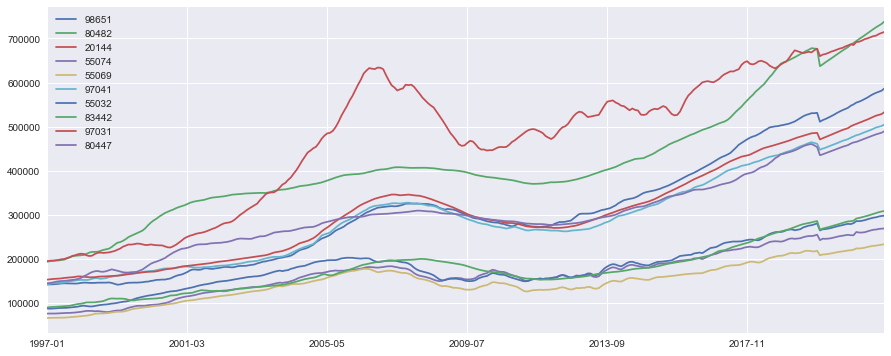

In [105]:
plt.style.use('seaborn')
for regionname in with_forecast.index:
    with_forecast.loc[regionname,:].plot(label=with_forecast.loc[regionname].name,figsize=(15,6))
    plt.legend(loc=2)

In [106]:
big10_list = ['98651', '80482', '20144', '55074', '55069', '97041', '55032','83442', '97031', '80447']

In [107]:
big10_df = Zillow.loc[(Zillow['RegionName'].isin(big10_list))]

In [108]:
big10_df

RegionID  RegionName                 City State  \
6088      99035       97031           Hood River    OR   
7025      94167       83442                Rigby    ID   
13350     82081       55069            Rush City    MN   
15010     93397       80447           Grand Lake    CO   
15467     82054       55032               Harris    MN   
15678     93426       80482          Winter Park    CO   
16247     99045       97041  Mount Hood Parkdale    OR   
18168     82086       55074               Shafer    MN   
21924     66240       20144            Delaplane    VA   
22692     99945       98651            Underwood    WA   

                                  Metro         CountyName  SizeRank  \
6088                         Hood River  Hood River County      6089   
7025                        Idaho Falls   Jefferson County      7026   
13350  Minneapolis-St. Paul-Bloomington     Chisago County     13351   
15010                               NaN       Grand County     15011   
15467  Minneapolis-St. Paul-Bloomington     Chisago County     15468   
15678                               NaN       Grand County     15679   
16247                        Hood River  Hood River County     16248   
18168  Minneapolis-St. Paul-Bloomington     Chisago County     18169   
21924   Washington-Arlington-Alexandria    Fauquier County     21925   
22692      Portland-Vancouver-Hillsboro    Skamania County     22693   

        1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07  \
6088   153000.0  153755.0  154520.0  154816.0  155274.0  155803.0  156783.0   
7025    89941.0   90694.0   91167.0   91532.0   91879.0   92310.0   92666.0   
13350   66032.0   66323.0   66384.0   66490.0   66515.0   66624.0   66839.0   
15010  144944.0  145490.0  146627.0  148190.0  149147.0  149814.0  150054.0   
15467   87320.0   87134.0   87512.0   87847.0   88523.0   88717.0   88839.0   
15678  193674.0  194821.0  195546.0  196047.0  196527.0  197410.0  198365.0   
16247  142773.0  143591.0  144916.0  145167.0  145763.0  145797.0  146674.0   
18168   76048.0   76177.0   76084.0   76137.0   76483.0   76929.0   77322.0   
21924  195129.0  196220.0  196343.0  196905.0  197745.0  199136.0  199748.0   
22692  141910.0  142060.0  142424.0  142861.0  143423.0  144306.0  144663.0   

        1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02  \
6088   157457.0  158033.0  158425.0  159326.0  160349.0  160136.0  159586.0   
7025    92949.0   93586.0   95095.0   96499.0   97780.0   98458.0   99699.0   
13350   67199.0   67838.0   68396.0   68881.0   69422.0   70053.0   70854.0   
15010  150824.0  151443.0  152310.0  153242.0  154611.0  156747.0  160507.0   
15467   89136.0   89711.0   90409.0   91014.0   91904.0   93360.0   93867.0   
15678  200846.0  203521.0  206153.0  207093.0  207553.0  208255.0  209088.0   
16247  147508.0  148923.0  150109.0  151218.0  151928.0  152328.0  152360.0   
18168   77473.0   77538.0   77984.0   78476.0   79202.0   79946.0   80919.0   
21924  201797.0  203983.0  206873.0  208441.0  210580.0  211842.0  211145.0   
22692  144471.0  144331.0  143932.0  144024.0  144452.0  145494.0  146223.0   

        1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09  \
6088   158794.0  158387.0  158409.0  158696.0  159595.0  160041.0  160172.0   
7025   101304.0  101275.0  101404.0  101478.0  102541.0  103296.0  104336.0   
13350   71276.0   72344.0   73622.0   75533.0   76064.0   76272.0   76124.0   
15010  163447.0  167136.0  170206.0  171977.0  172639.0  171095.0  170819.0   
15467   93037.0   92214.0   92221.0   93348.0   94513.0   95513.0   96243.0   
15678  211525.0  214385.0  215891.0  216049.0  216208.0  218423.0  220390.0   
16247  152103.0  152951.0  154939.0  156351.0  156194.0  154893.0  155648.0   
18168   82136.0   82070.0   82016.0   81257.0   81686.0   80952.0   80396.0   
21924  208191.0  206489.0  207360.0  211313.0  213776.0  214402.0  213547.0   
22692  146119.0  145606.0  145486.0  145666.0

In [109]:
big10_df = big10_df.drop(["RegionID","City","CountyName","SizeRank","State","Metro"],axis=1)


In [110]:
big10_df

RegionName   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06  \
6088        97031  153000.0  153755.0  154520.0  154816.0  155274.0  155803.0   
7025        83442   89941.0   90694.0   91167.0   91532.0   91879.0   92310.0   
13350       55069   66032.0   66323.0   66384.0   66490.0   66515.0   66624.0   
15010       80447  144944.0  145490.0  146627.0  148190.0  149147.0  149814.0   
15467       55032   87320.0   87134.0   87512.0   87847.0   88523.0   88717.0   
15678       80482  193674.0  194821.0  195546.0  196047.0  196527.0  197410.0   
16247       97041  142773.0  143591.0  144916.0  145167.0  145763.0  145797.0   
18168       55074   76048.0   76177.0   76084.0   76137.0   76483.0   76929.0   
21924       20144  195129.0  196220.0  196343.0  196905.0  197745.0  199136.0   
22692       98651  141910.0  142060.0  142424.0  142861.0  143423.0  144306.0   

        1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01  \
6088   156783.0  157457.0  158033.0  158425.0  159326.0  160349.0  160136.0   
7025    92666.0   92949.0   93586.0   95095.0   96499.0   97780.0   98458.0   
13350   66839.0   67199.0   67838.0   68396.0   68881.0   69422.0   70053.0   
15010  150054.0  150824.0  151443.0  152310.0  153242.0  154611.0  156747.0   
15467   88839.0   89136.0   89711.0   90409.0   91014.0   91904.0   93360.0   
15678  198365.0  200846.0  203521.0  206153.0  207093.0  207553.0  208255.0   
16247  146674.0  147508.0  148923.0  150109.0  151218.0  151928.0  152328.0   
18168   77322.0   77473.0   77538.0   77984.0   78476.0   79202.0   79946.0   
21924  199748.0  201797.0  203983.0  206873.0  208441.0  210580.0  211842.0   
22692  144663.0  144471.0  144331.0  143932.0  144024.0  144452.0  145494.0   

        1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08  \
6088   159586.0  158794.0  158387.0  158409.0  158696.0  159595.0  160041.0   
7025    99699.0  101304.0  101275.0  101404.0  101478.0  102541.0  103296.0   
13350   70854.0   71276.0   72344.0   73622.0   75533.0   76064.0   76272.0   
15010  160507.0  163447.0  167136.0  170206.0  171977.0  172639.0  171095.0   
15467   93867.0   93037.0   92214.0   92221.0   93348.0   94513.0   95513.0   
15678  209088.0  211525.0  214385.0  215891.0  216049.0  216208.0  218423.0   
16247  152360.0  152103.0  152951.0  154939.0  156351.0  156194.0  154893.0   
18168   80919.0   82136.0   82070.0   82016.0   81257.0   81686.0   80952.0   
21924  211145.0  208191.0  206489.0  207360.0  211313.0  213776.0  214402.0   
22692  146223.0  146119.0  145606.0  145486.0  145666.0  146116.0  146096.0   

        1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03  \
6088   160172.0  160458.0  160861.0  161343.0  161480.0  161959.0  162416.0   
7025   104336.0  106937.0  109304.0  110350.0  109969.0  109814.0  110006.0   
13350   76124.0   76711.0   77462.0   78500.0   79503.0   80049.0   80310.0   
15010  170819.0  172073.0  174120.0  176296.0  174767.0  173245.0  171404.0   
15467   96243.0   96716.0   97471.0   98680.0   99198.0  100387.0  101480.0   
15678  220390.0  221897.0  223252.0  227013.0  232059.0  236560.0  238088.0   
16247  155648.0  156361.0  158553.0  159590.0  161155.0  161663.0  163732.0   
18168   80396.0   79478.0   79558.0   81039.0   82205.0   83088.0   82987.0   
21924  213547.0  214193.0  214764.0  216340.0  217844.0  220715.0  223306.0   
22692  146131.0  146172.0  146661.0  145471.0  143526.0  141554.0  142061.0   

        1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10  \
6088   163360.0  164071.0  165130.0  166156.0  167197.0  168399.0  168977.0   
7025   109829.0  109022.0  107098.0  106035.0  105803.0  106978.0  107768.0   
13350   80505.0   81707.0   83512.0   85638.0   87016.0   87883.0   88550.0   
15010  169791.0  169069.0  169106.0  169868.0  170225.0  170961.0  173419.0   
15467  102748.0  103375.0  104636.0  106515.0  108838.0  110890.0  112561.0   
15678  240983.0  244716.0  2495

In [111]:
big10_df = big10_df.drop(["Growth","std","mean"],axis=1)
big10_df.set_index('RegionName', inplace=True)


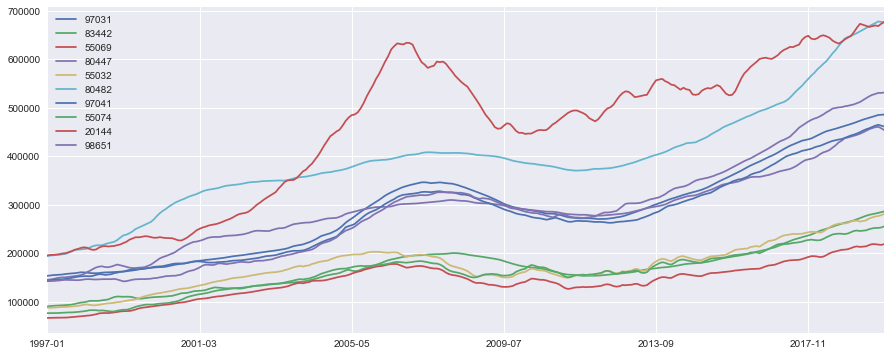

In [112]:
plt.style.use('seaborn')
for regionname in big10_df.index:
    big10_df.loc[regionname,:].plot(label=big10_df.loc[regionname].name,figsize=(15,6))
    plt.legend(loc=2)